In [1]:
import pandas as pd
import glob
import os
from sklearn.metrics import average_precision_score, auc
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu

/users/arpitas/miniconda3/envs/dnalm/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from variant_tasks import *

In [3]:
os.environ['DART_WORK_DIR'] = '/oak/stanford/groups/akundaje/arpitas/dart-eval'
work_dir = os.environ.get("DART_WORK_DIR", "")

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.9999362568338305
HyenaDNA African Significant caQTLs


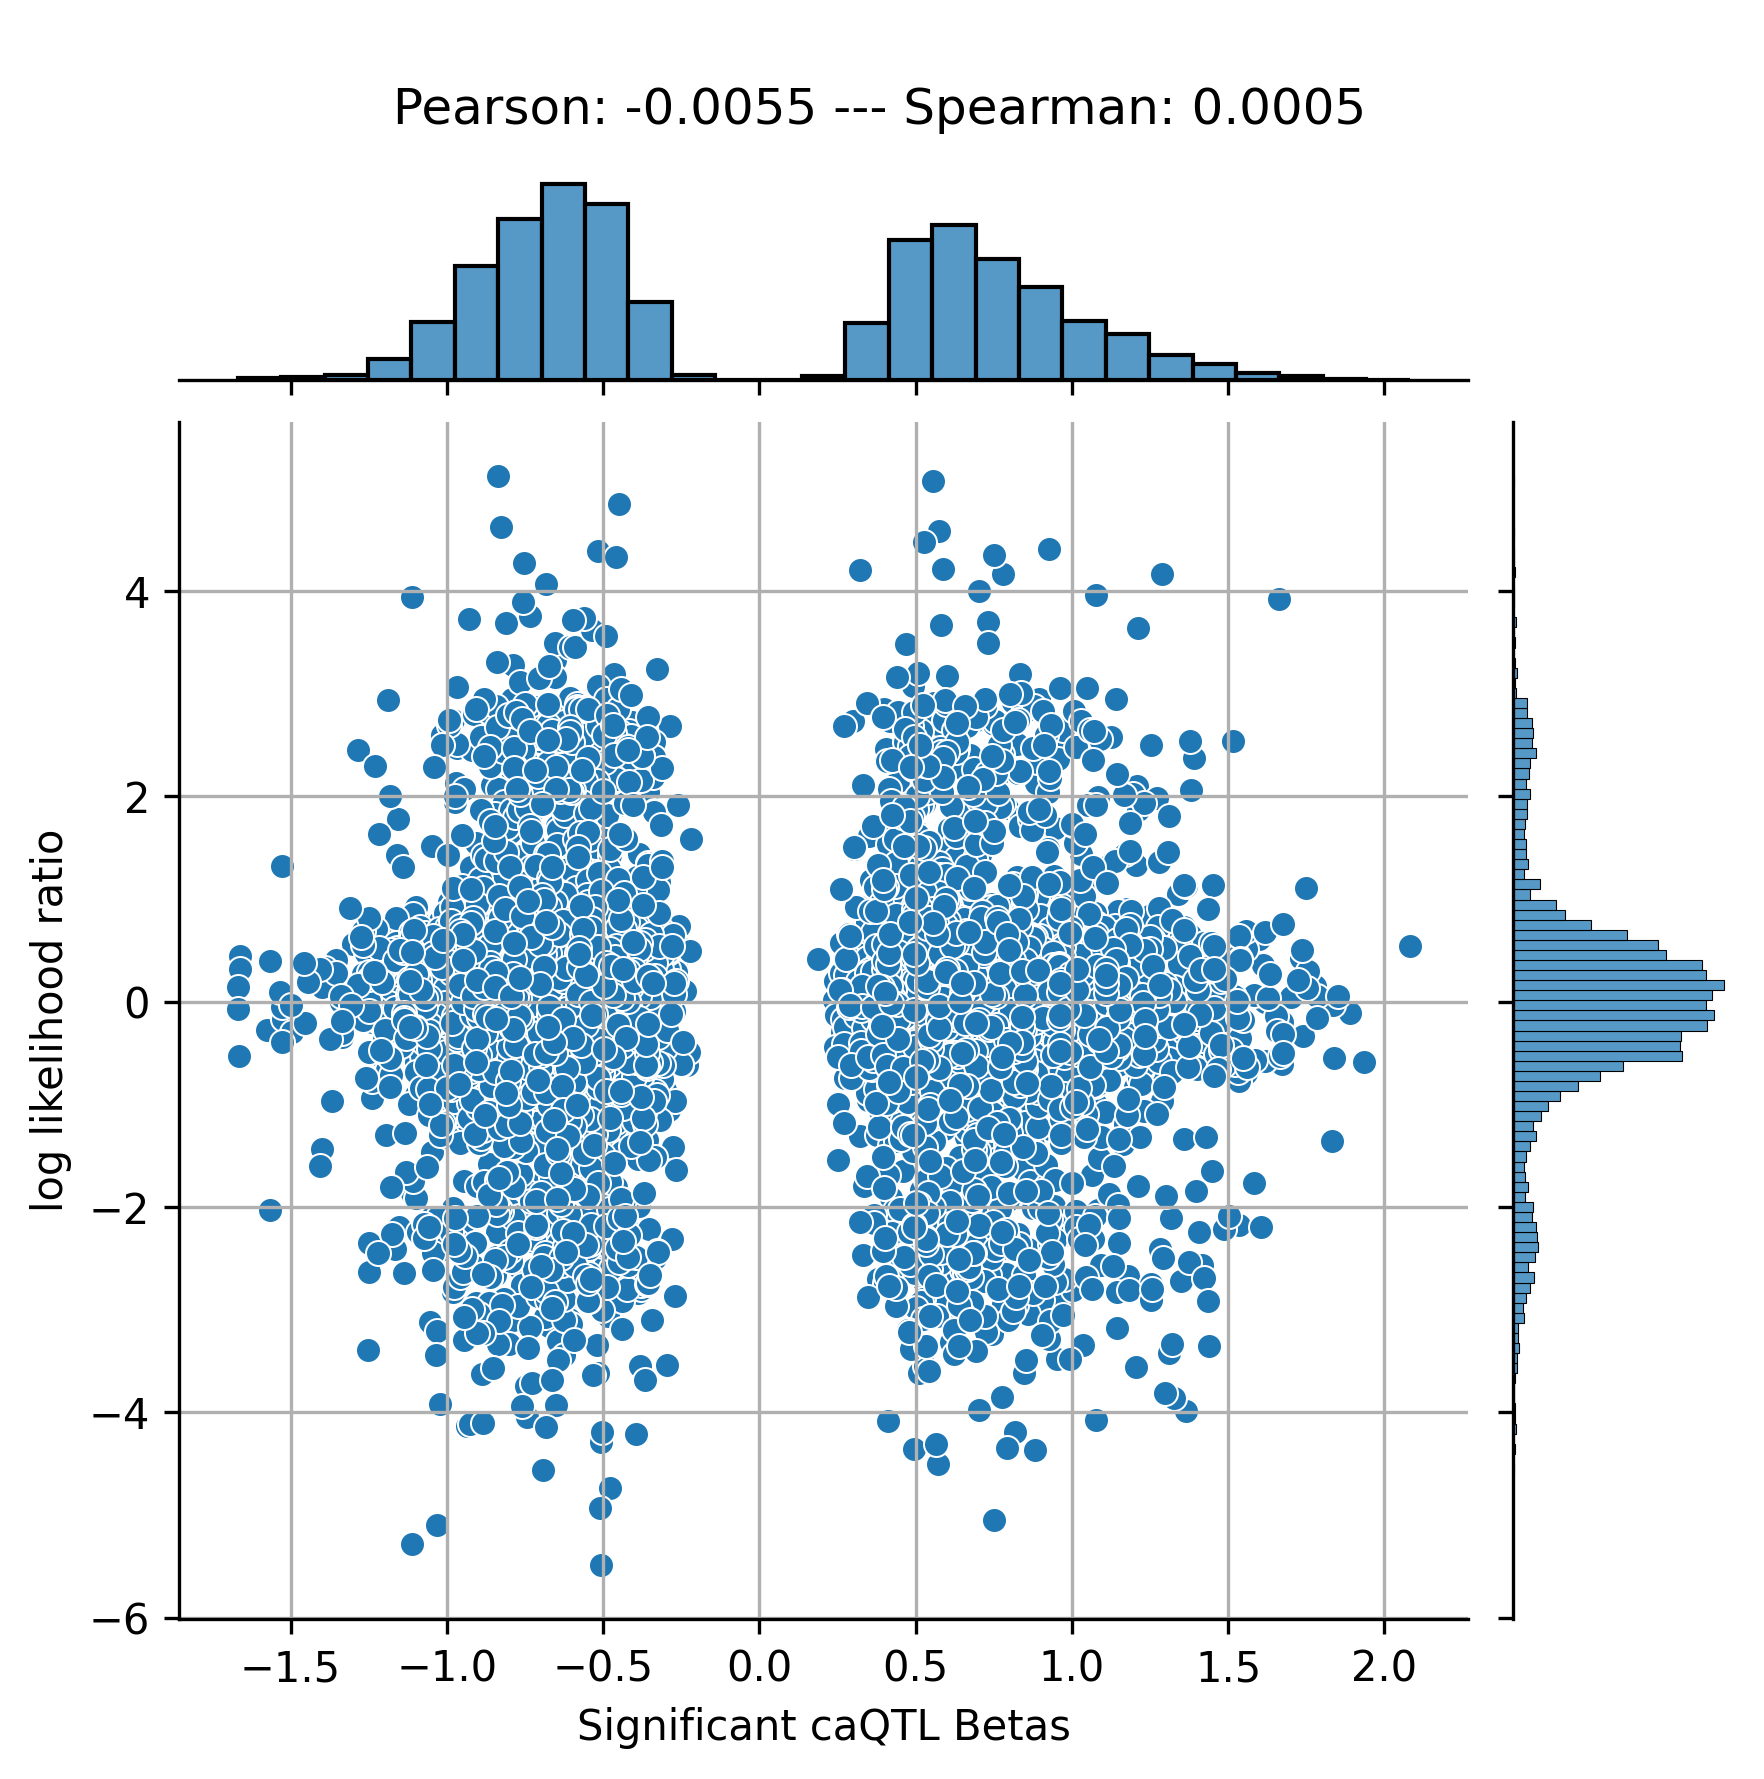

0.08161138365438975 0.4860352028353586 -0.005455264432403145 0.0004984938282831963
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 2.1557887498743167e-12
Nucleotide Transformer African Significant caQTLs


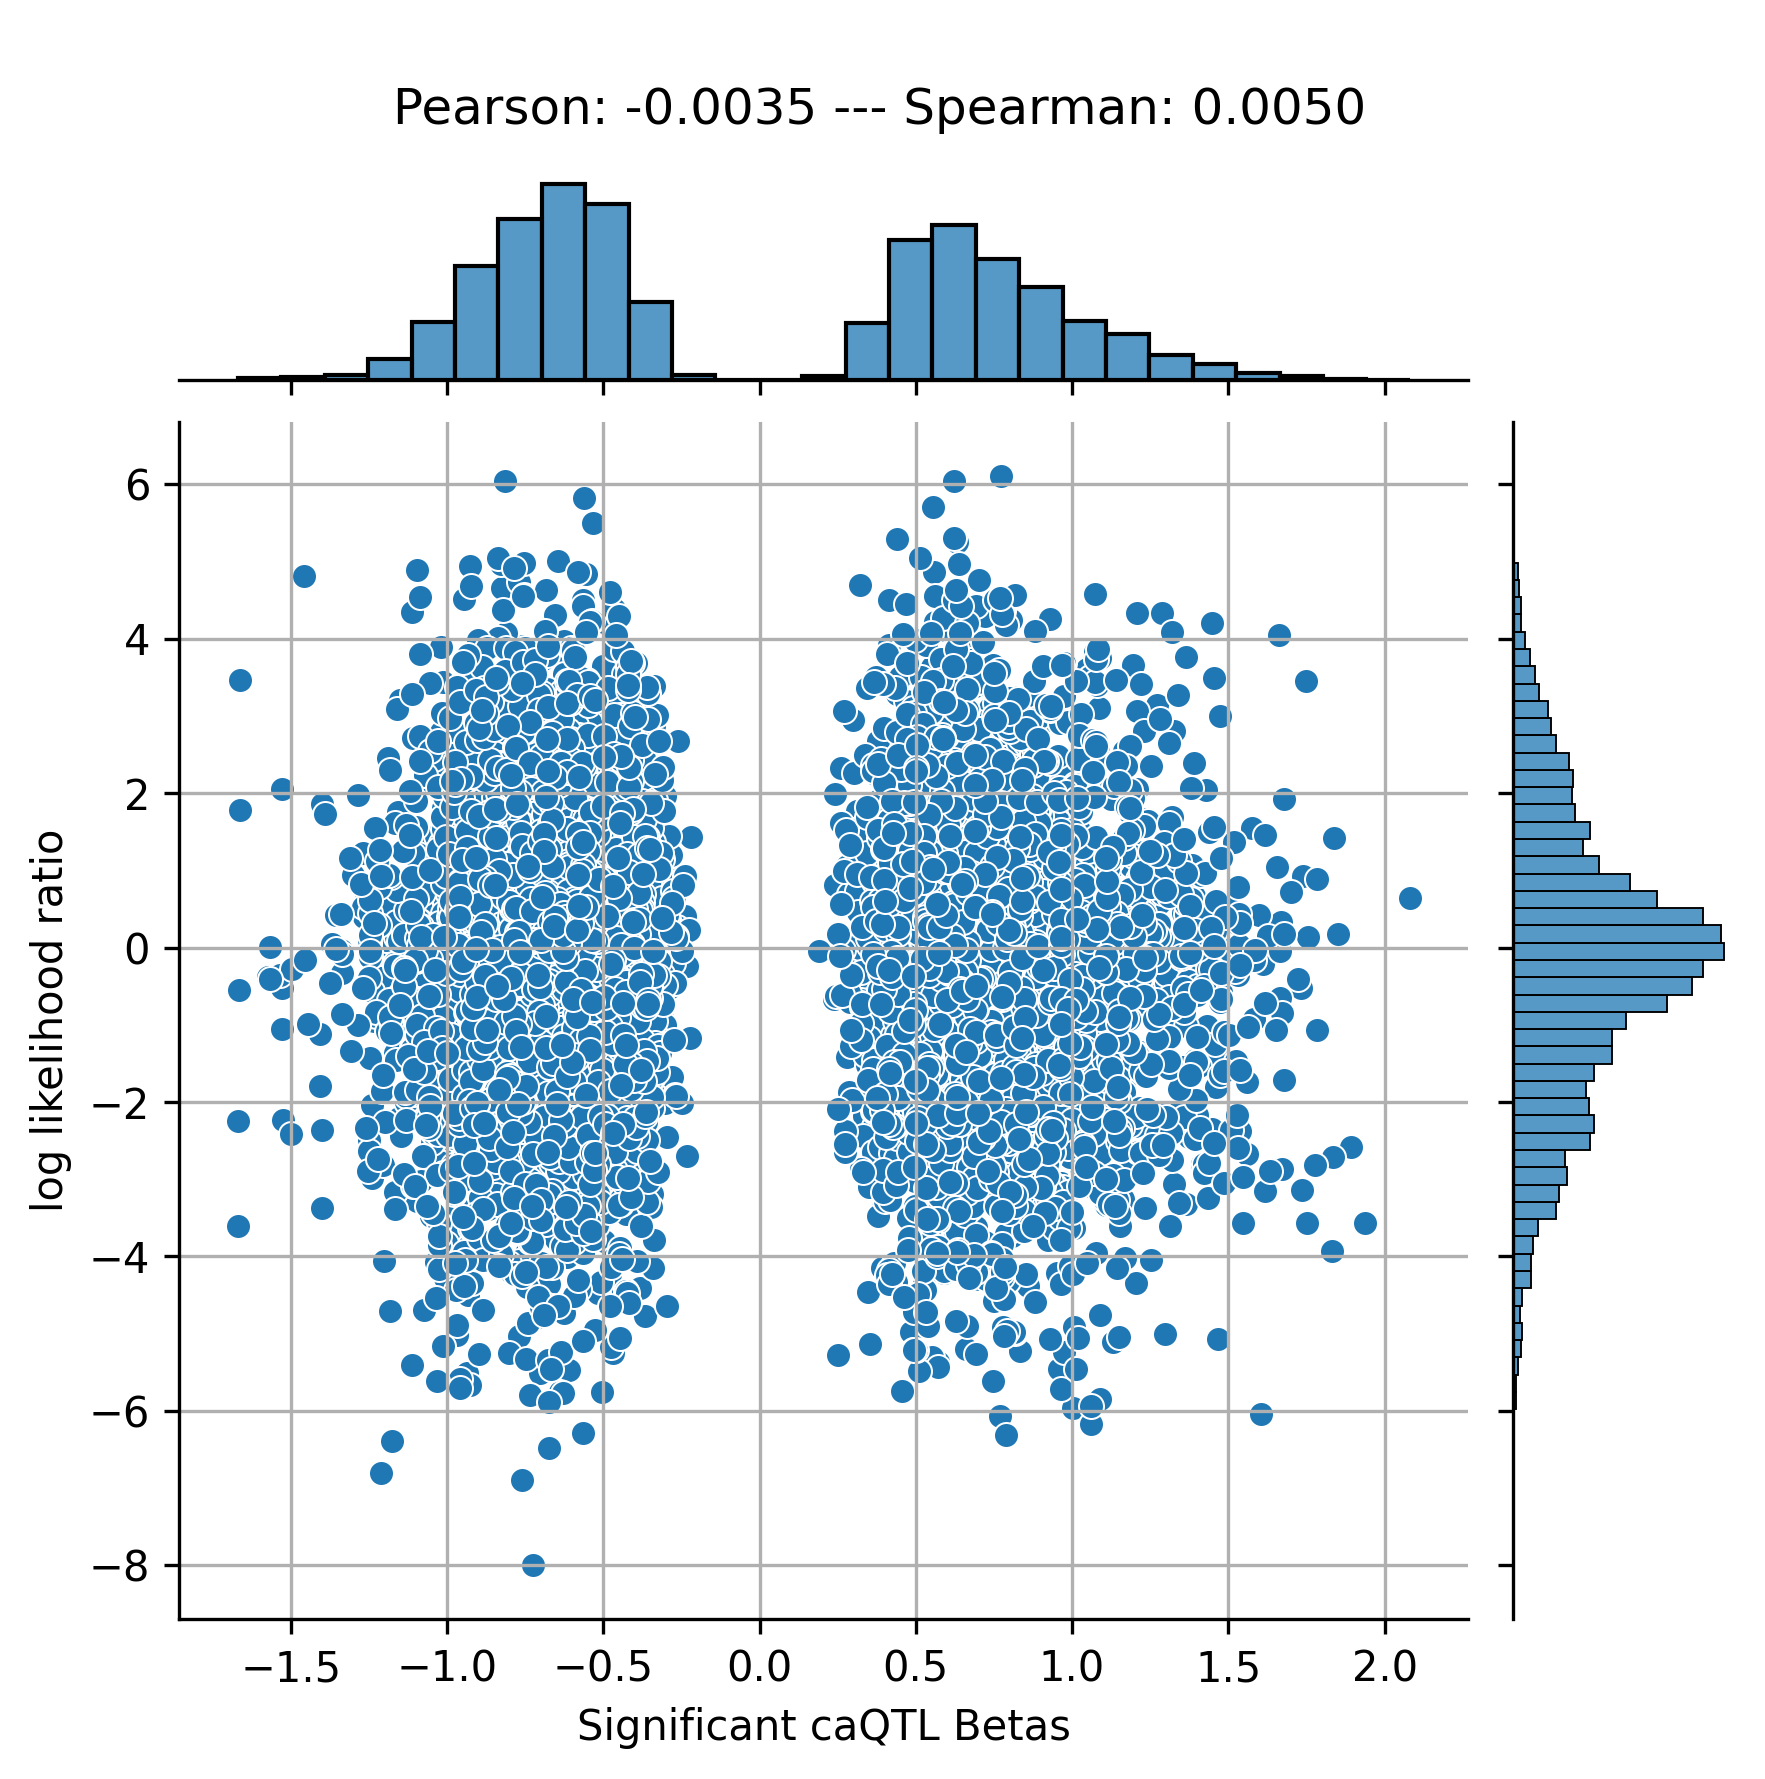

0.09208634652609568 0.5252470682737939 -0.003506083829611866 0.00501212925508905
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 2.308004824851355e-12
Caduceus African Significant caQTLs


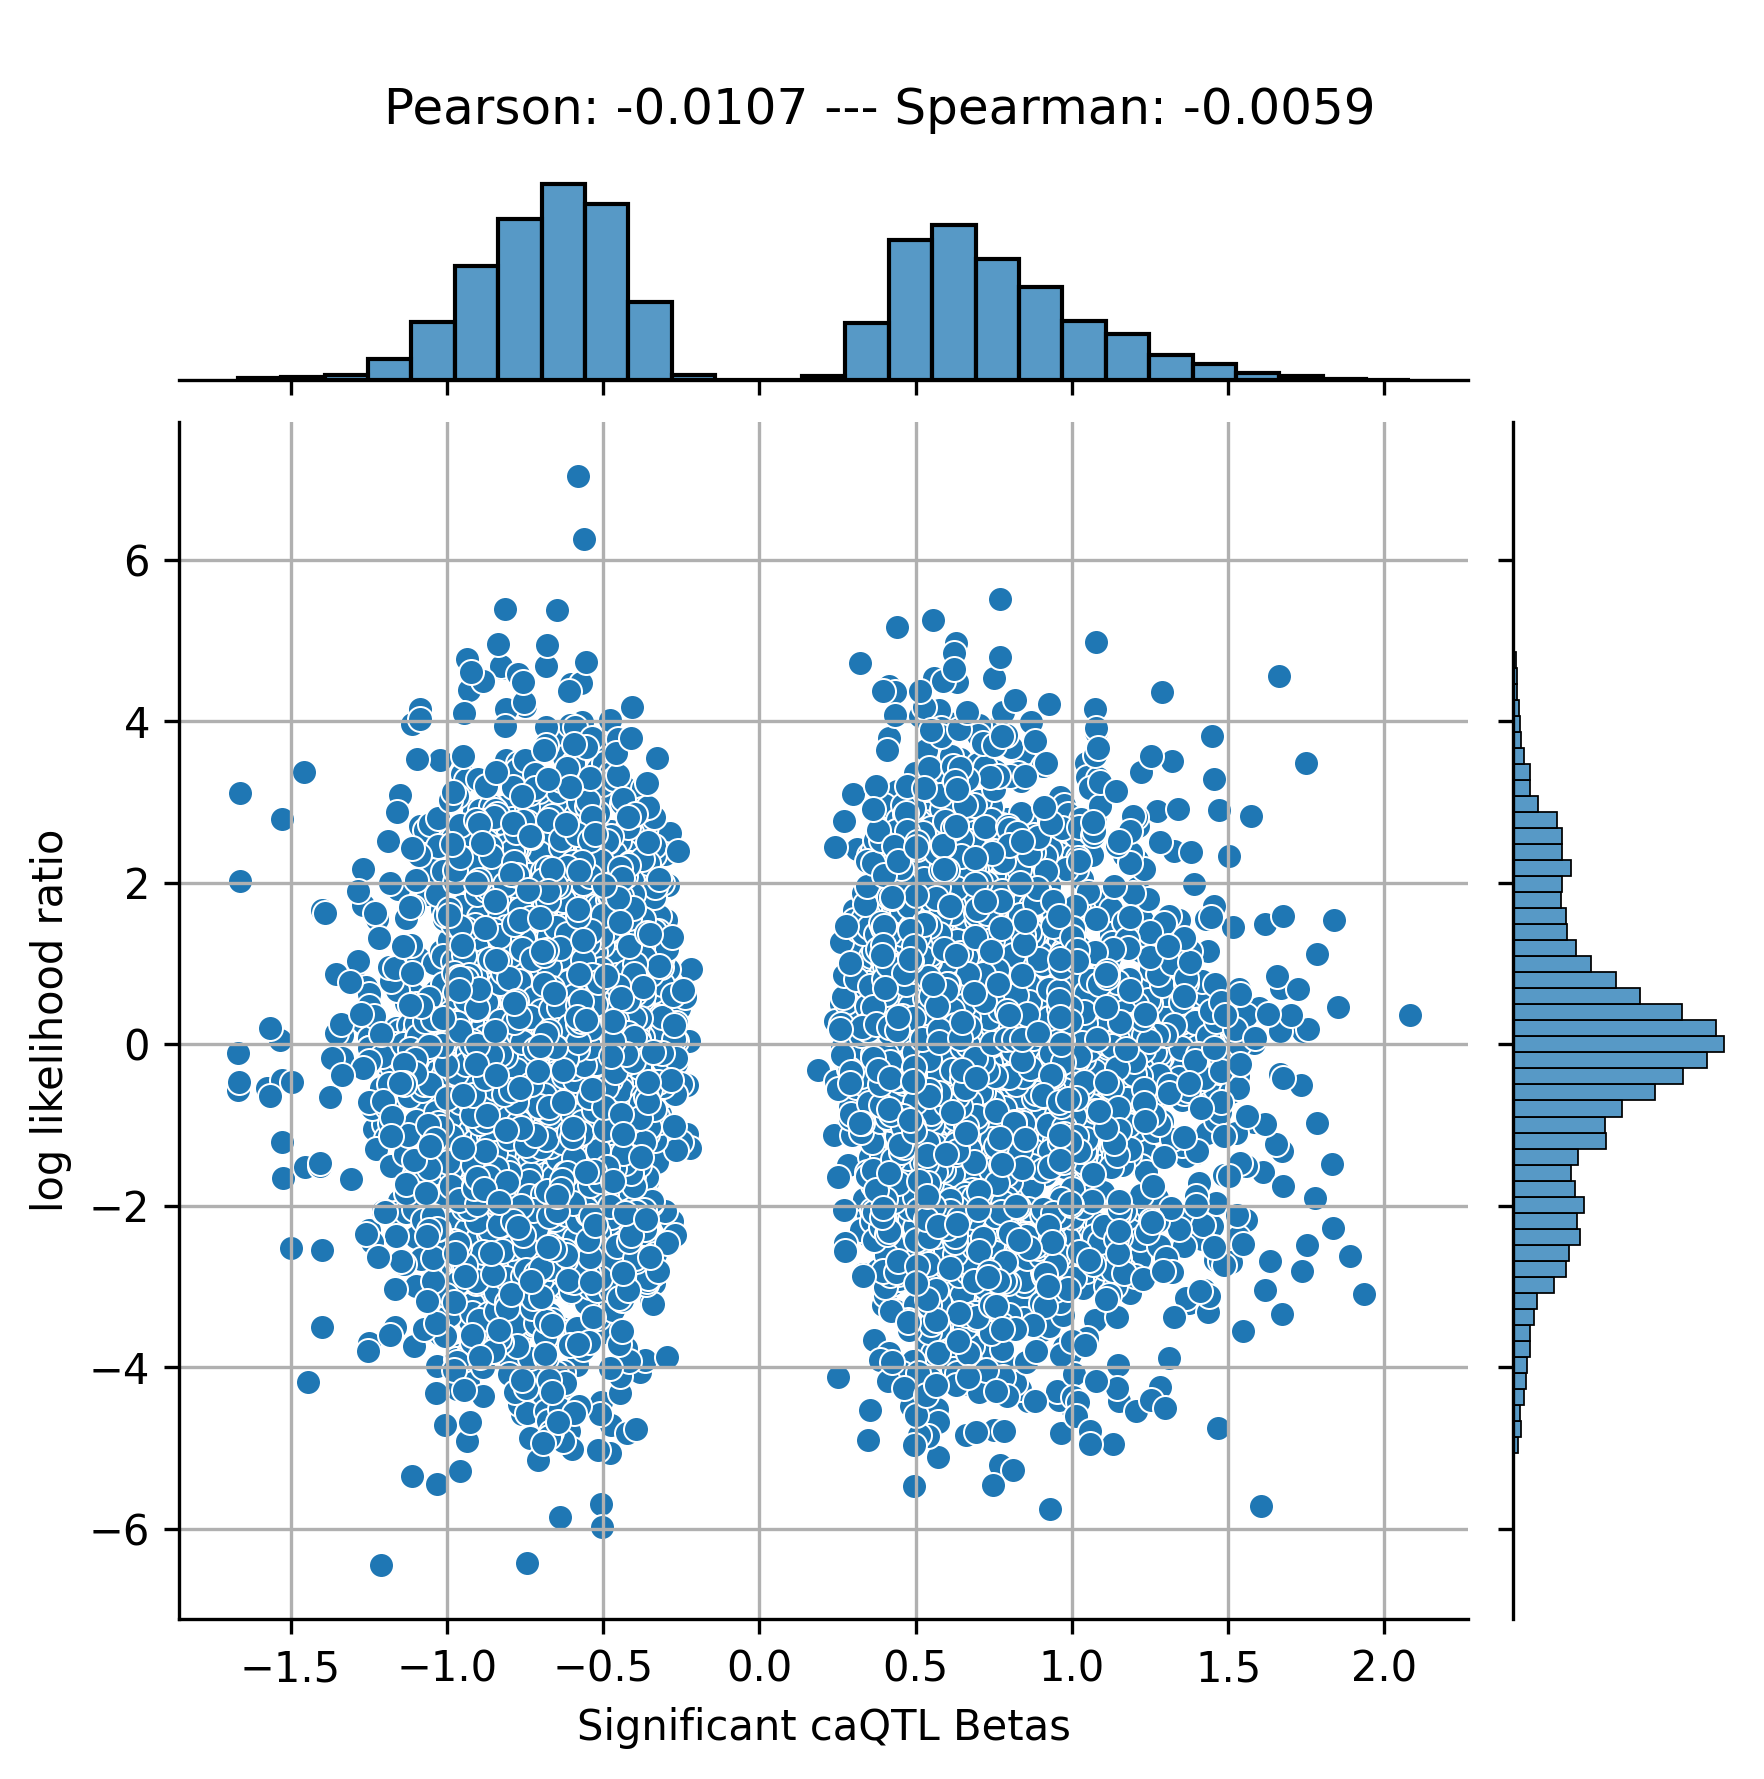

0.09208018913313476 0.5252118475936163 -0.010746229298860809 -0.0059403796169044945
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
HyenaDNA Yoruba Significant dsQTLs


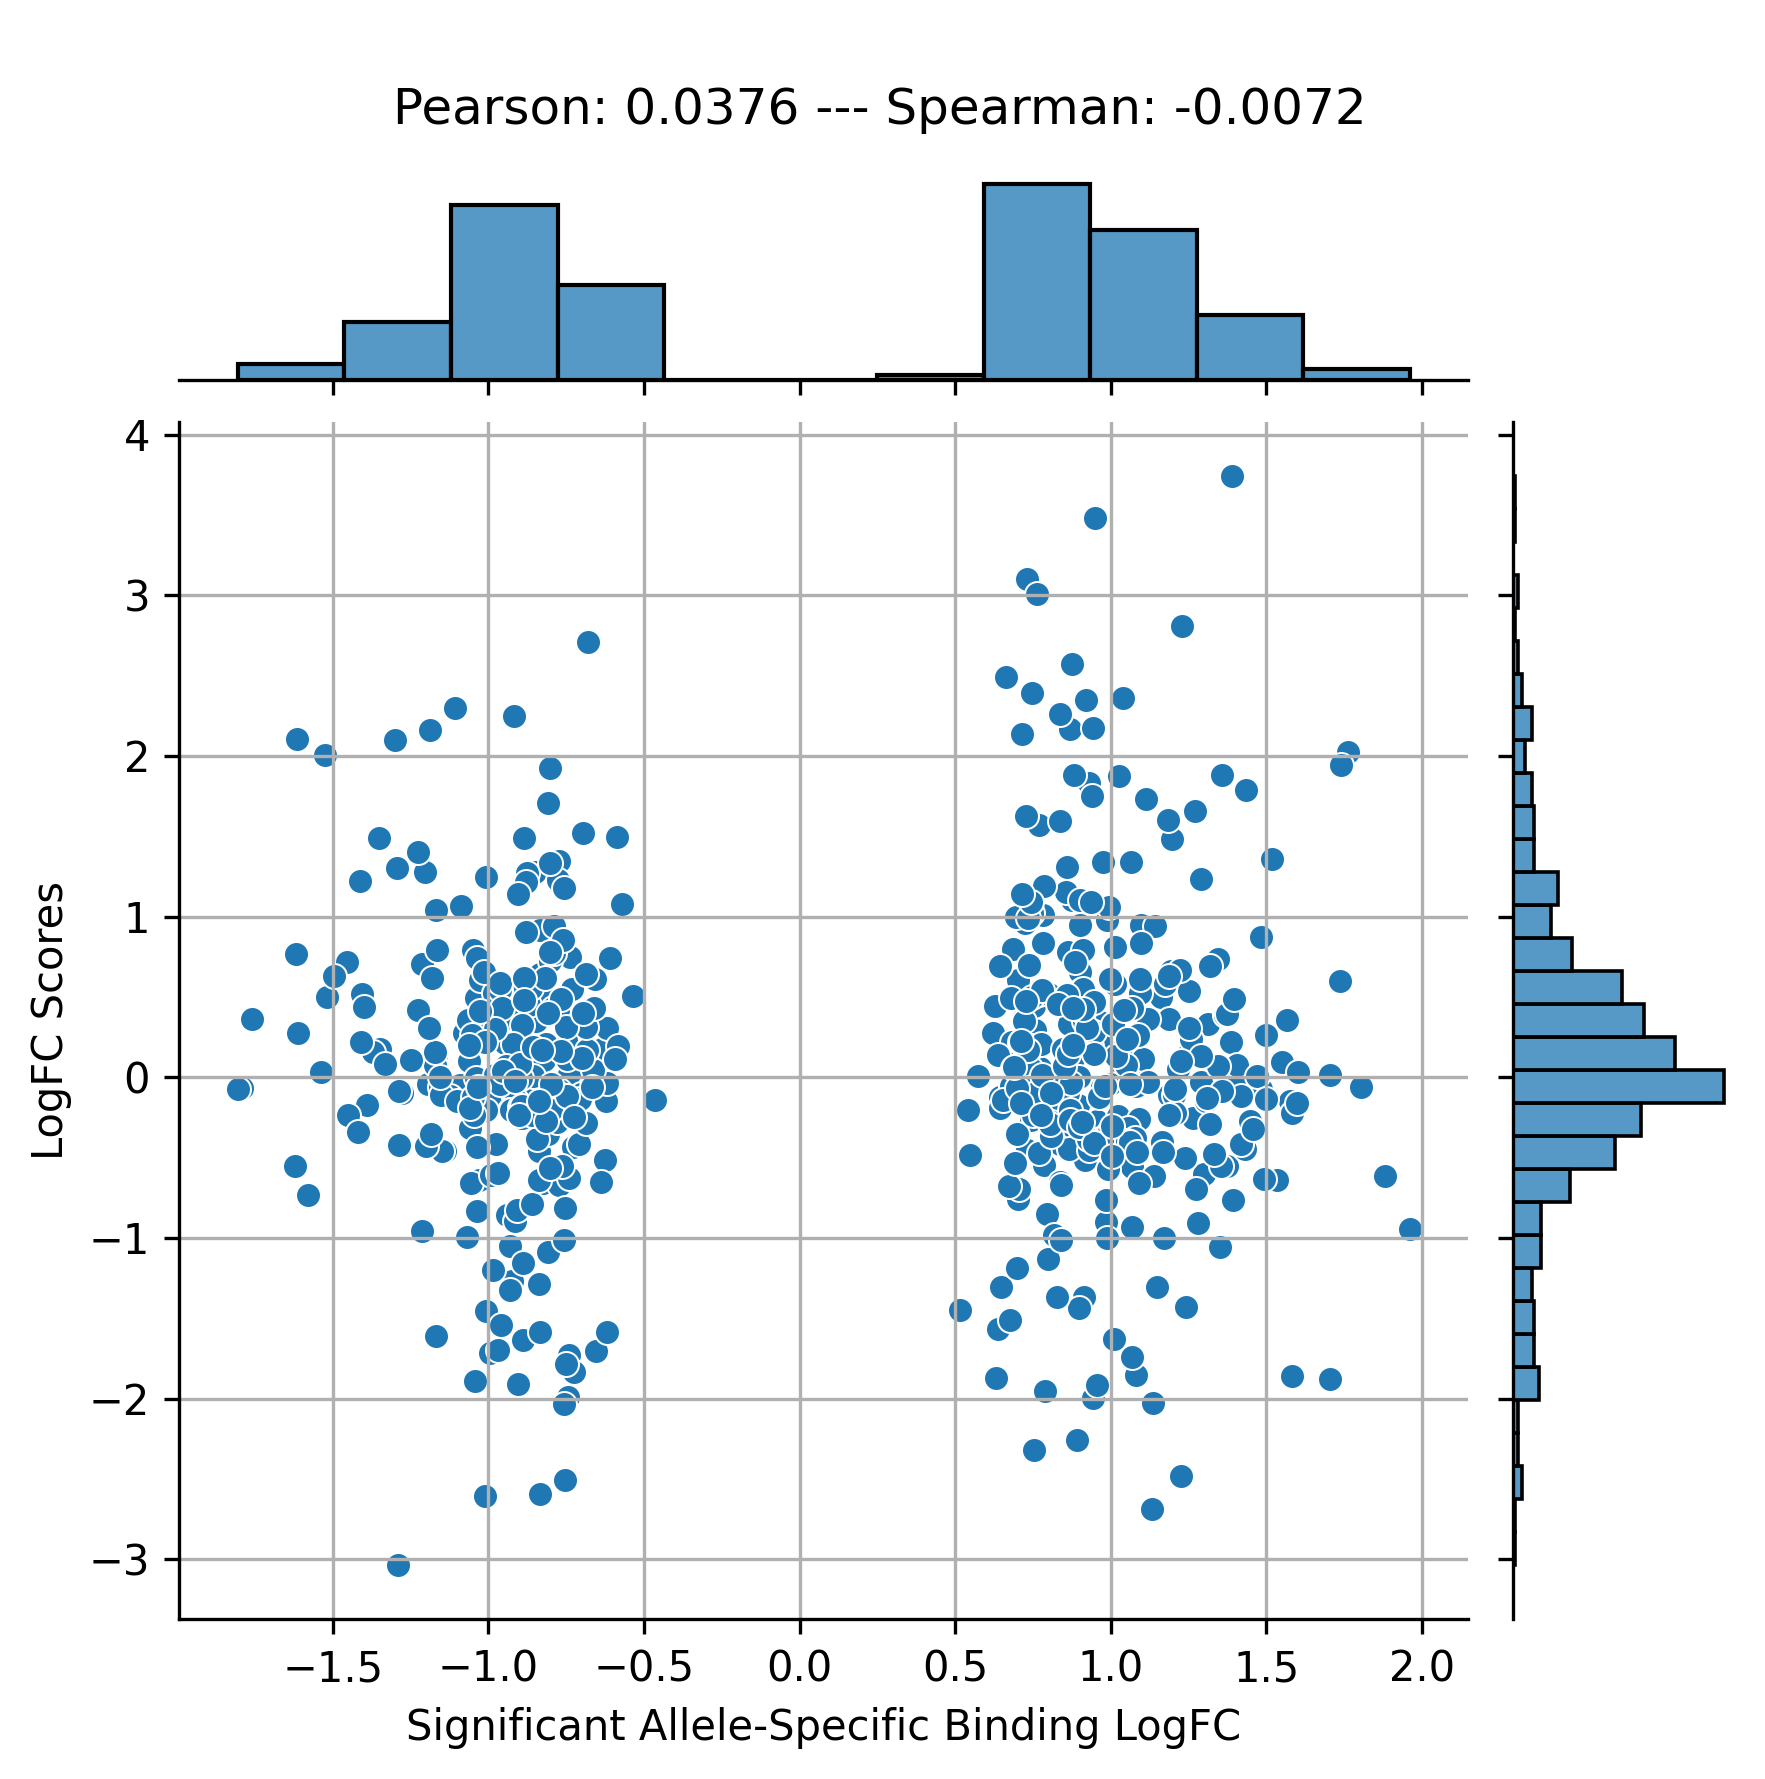

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Nucleotide Transformer Yoruba Significant dsQTLs


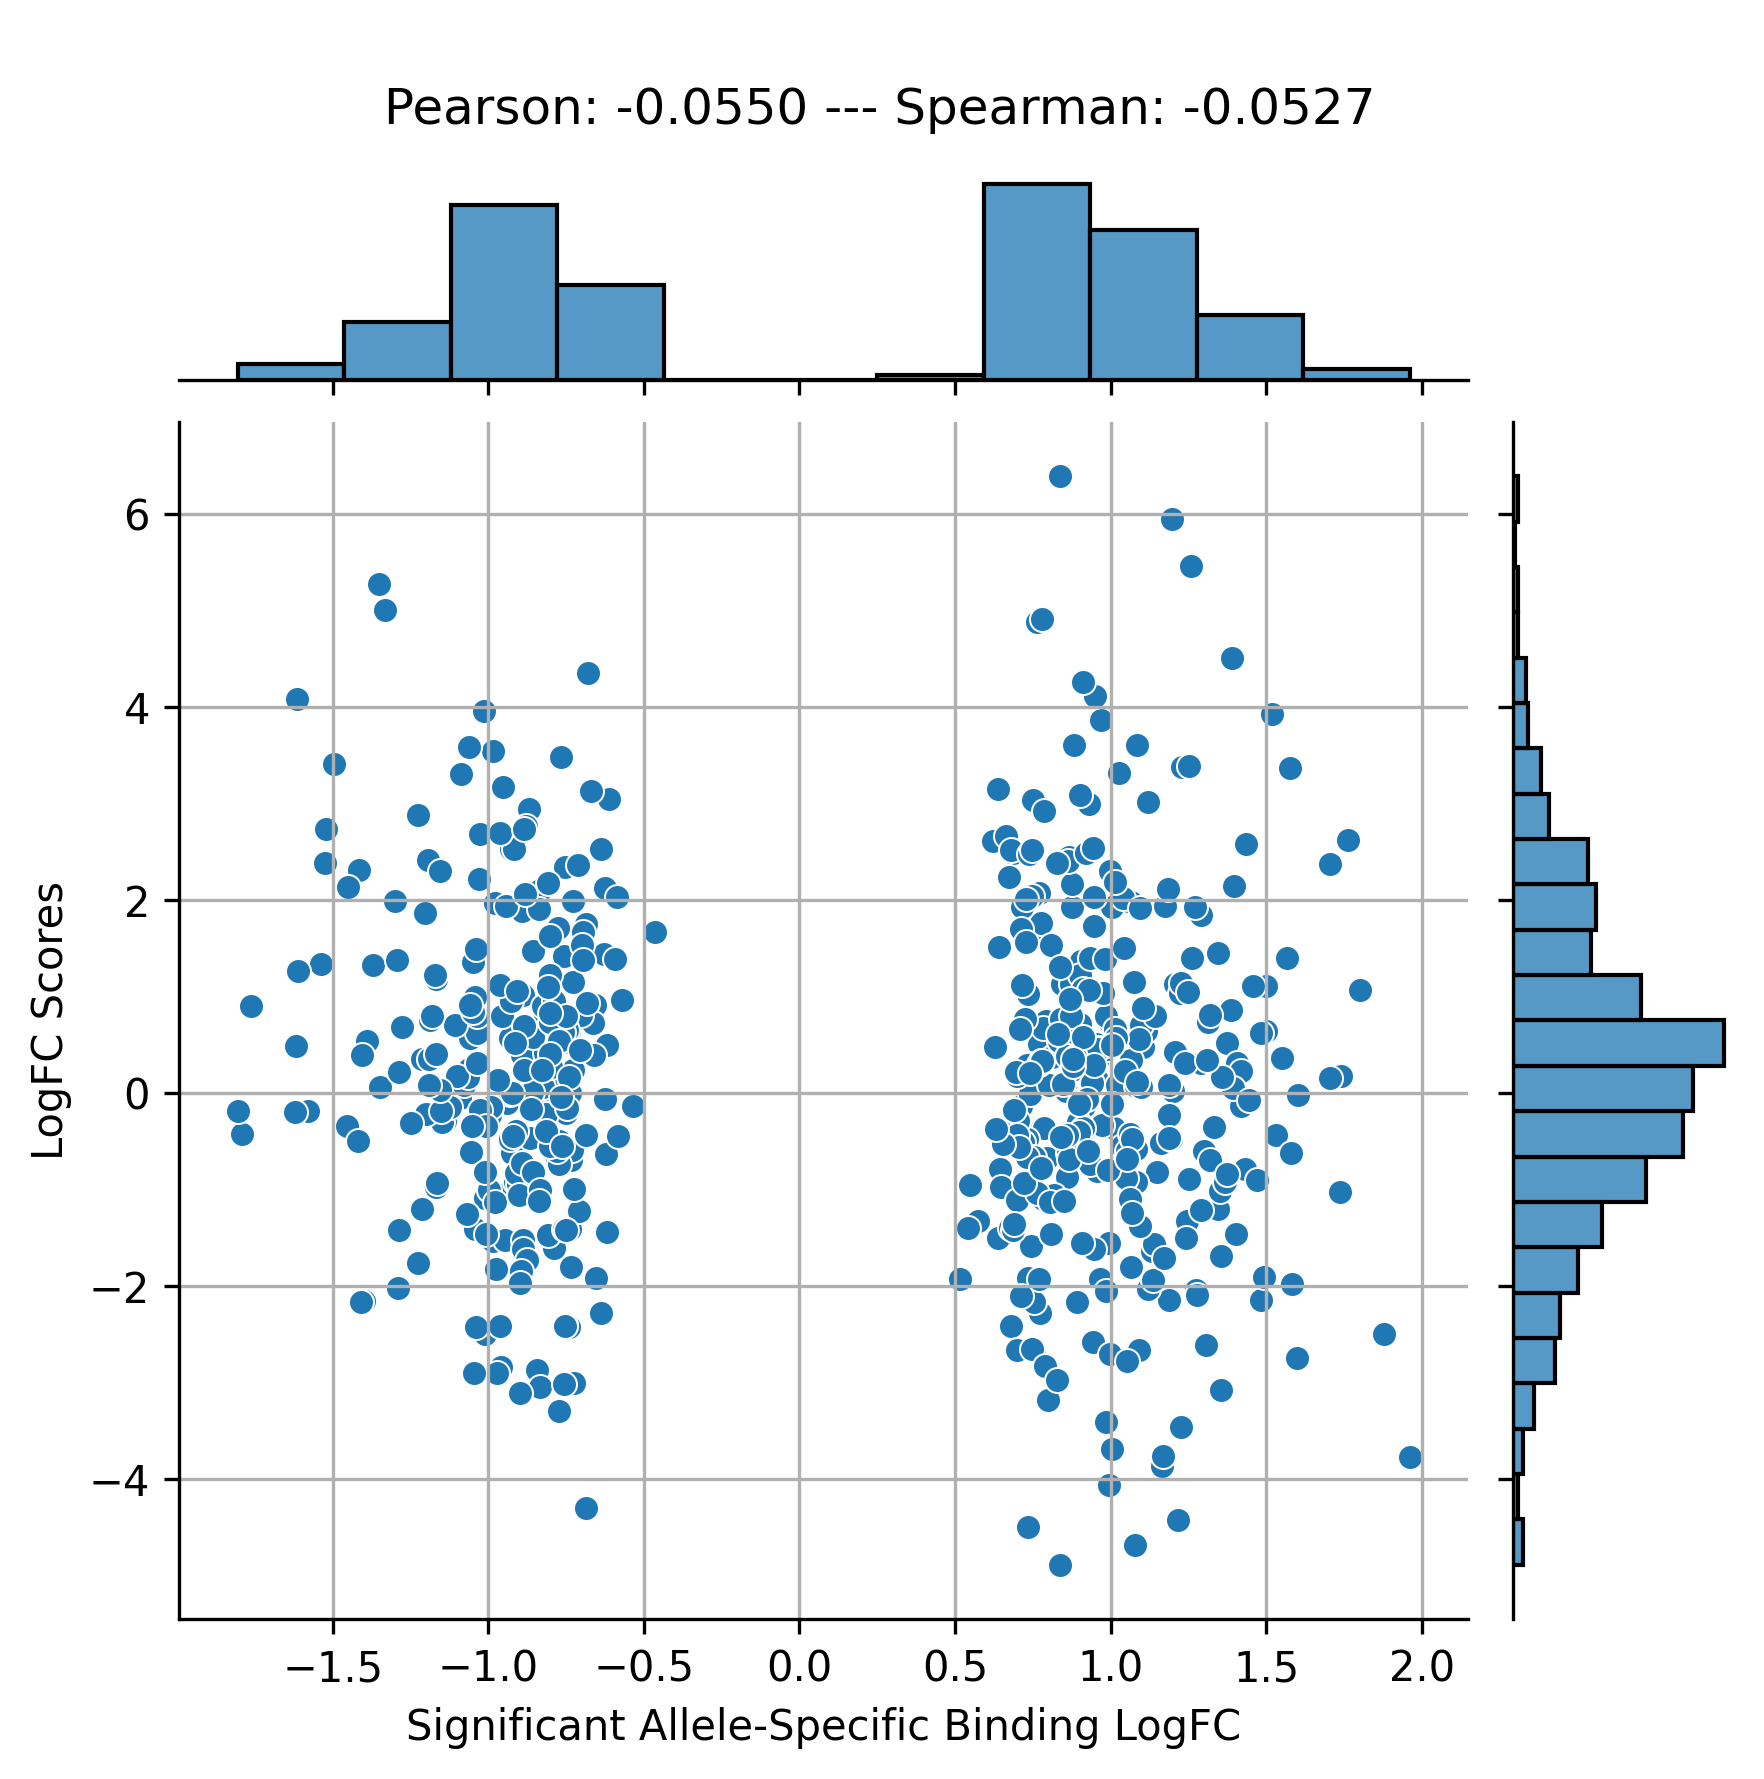

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Caduceus Yoruba Significant dsQTLs


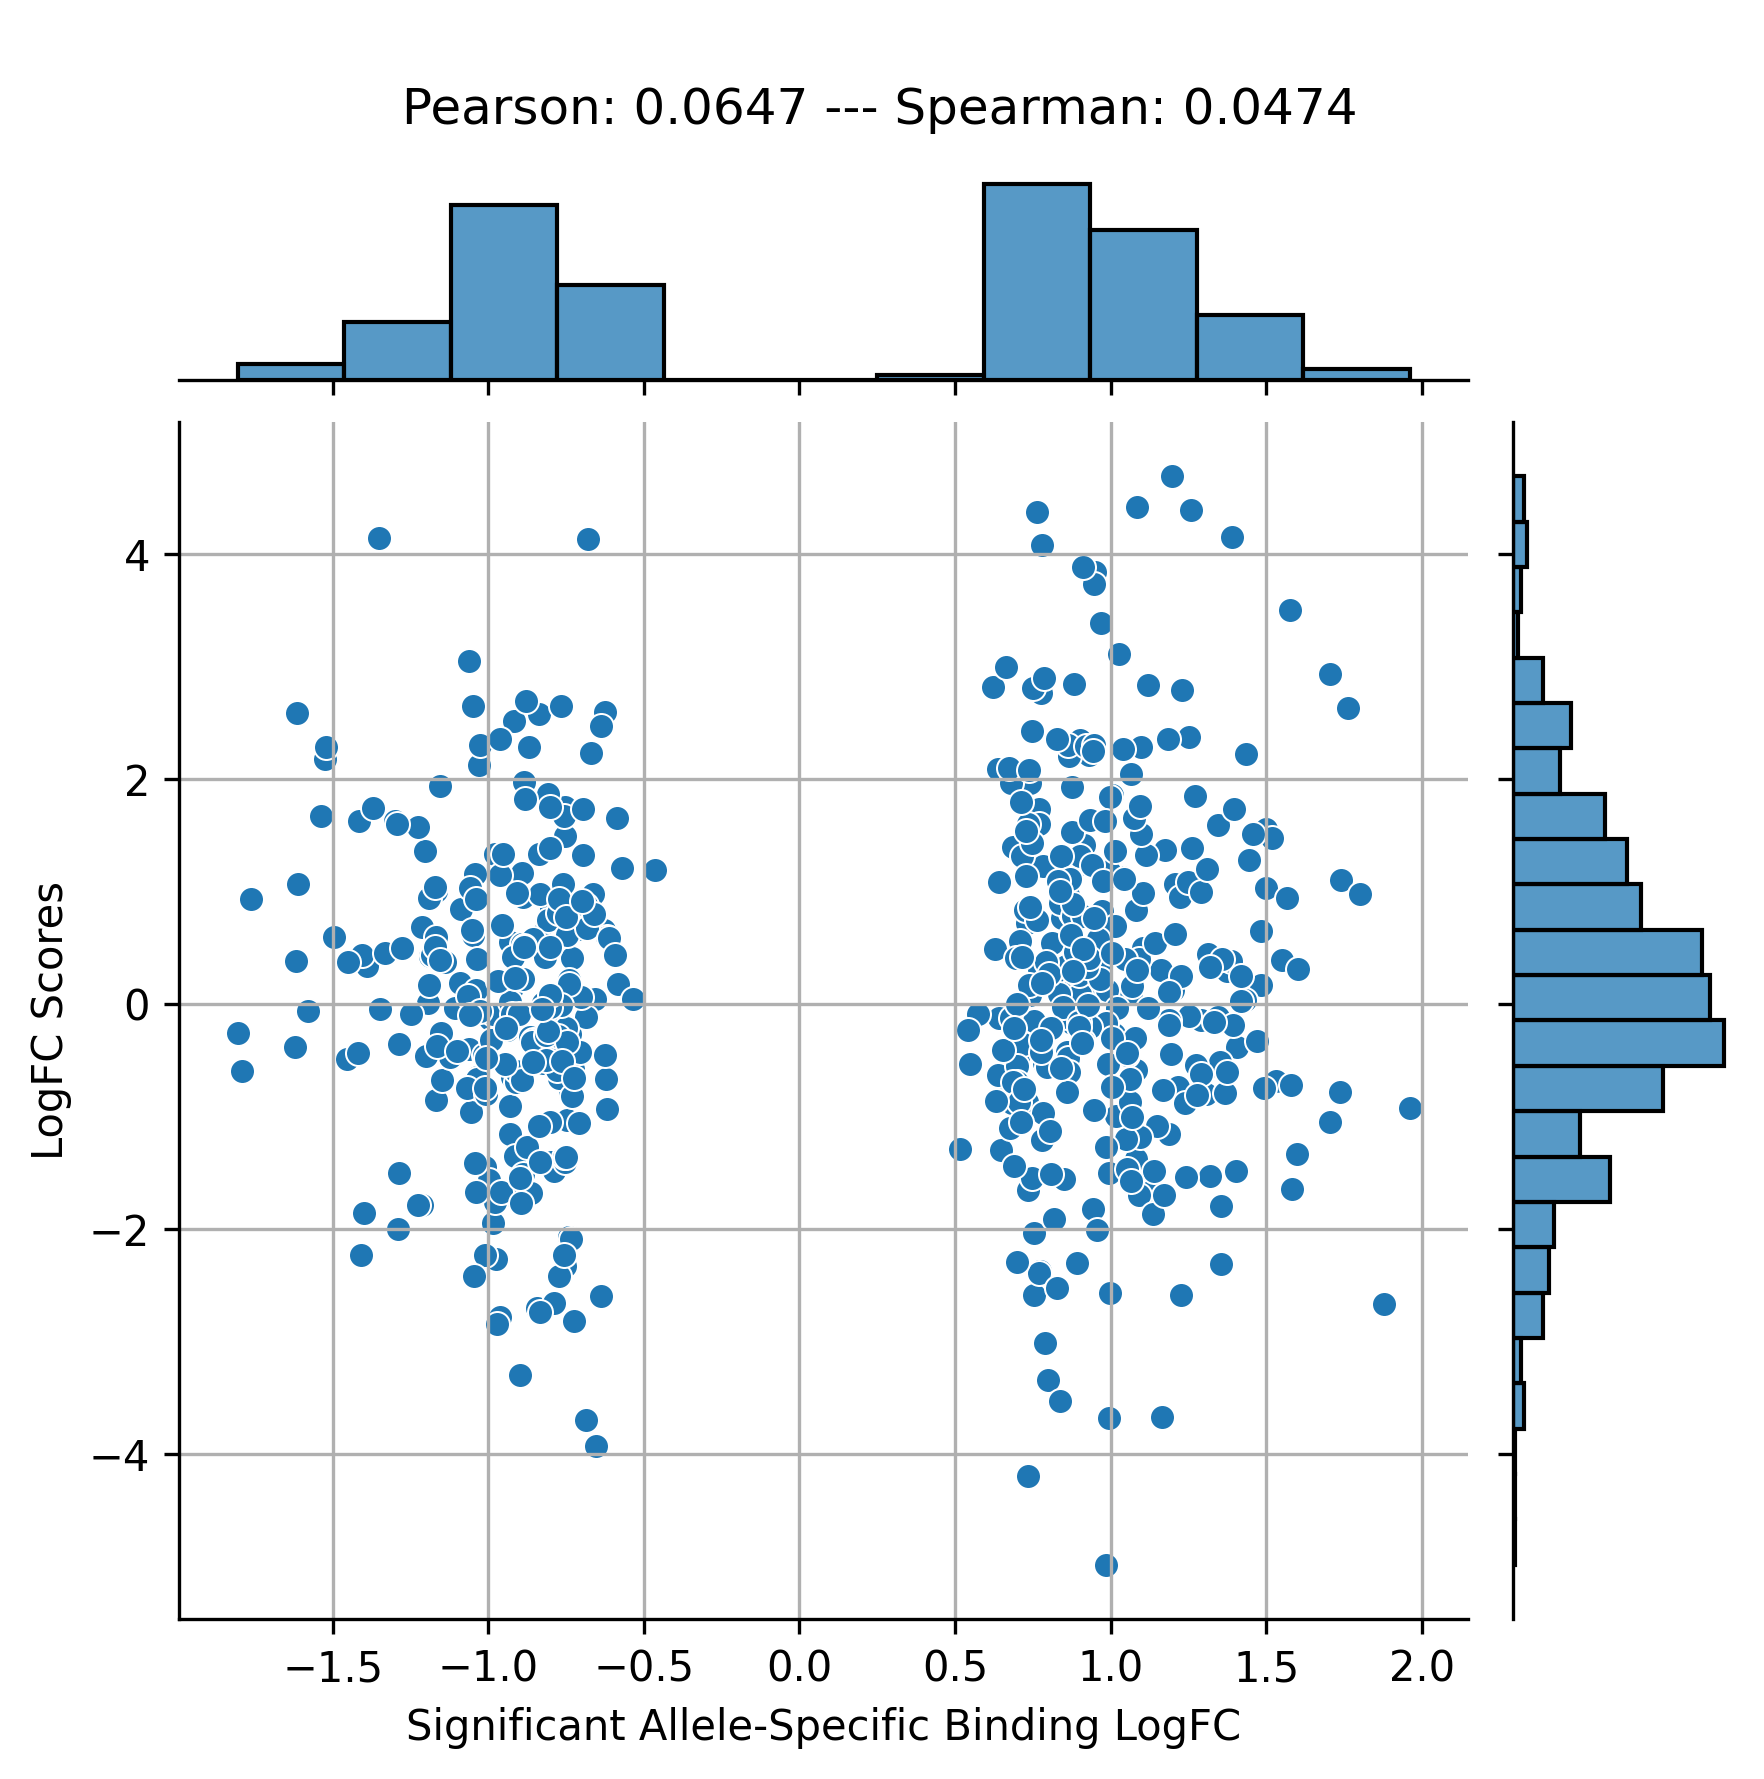

In [4]:
model_names=["hyenadna-large-1m-seqlen-hf", "nucleotide-transformer-v2-500m-multi-species", "caduceus-ps_seqlen-131k_d_model-256_n_layer-16"]
models=["HyenaDNA", "Nucleotide Transformer", "Caduceus"]
model_path = os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/zero_shot/likelihoods")

afr_counts_pvals = []
afr_counts_auprc = []
afr_counts_auroc = []
afr_counts_pearson = []
afr_counts_spearman = []

yoruba_counts_pvals = []
yoruba_counts_auprc = []
yoruba_counts_auroc = []
yoruba_counts_pearson = []
yoruba_counts_spearman = []

for model_name, model in zip(model_names, models):
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.tsv")
    filtered_var_afr_caQTLs_df_ctrl, ctrl_afr_countss = compute_change(filtered_var_afr_caQTLs_df_ctrl)
    filtered_var_afr_caQTLs_df_sig, sig_afr_countss = compute_change(filtered_var_afr_caQTLs_df_sig)
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_countss, sig_afr_countss, alternative="less")
    afr_counts_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    print(f"{model} African Significant caQTLs")
    pearson, spearman = beta_logfc(filtered_var_afr_caQTLs_df_sig, "", "log likelihood ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_afr_countss, sig_afr_countss)
    afr_counts_auprc += [auprc]
    afr_counts_auroc += [auroc]
    afr_counts_pearson += [pearson]
    afr_counts_spearman += [spearman]
    print(auprc, auroc, pearson, spearman)
    
for model_name, model in zip(model_names, models):    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/yoruban.dsqtls.benchmarking.tsv")
    filtered_var_yoruba_caQTLs_df_ctrl, ctrl_yoruba_countss = compute_change(filtered_var_yoruba_caQTLs_df_ctrl)
    filtered_var_yoruba_caQTLs_df_sig, sig_yoruba_countss = compute_change(filtered_var_yoruba_caQTLs_df_sig)
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_countss, sig_yoruba_countss, alternative="less")
    yoruba_counts_pvals += [yoruba_pval]
    print(f"{model} Yoruba Significant dsQTLs")
    pearson, spearman = est_size_logfc(filtered_var_yoruba_caQTLs_df_sig, "", "log likelihood ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_countss, sig_yoruba_countss)
    yoruba_counts_auprc += [auprc]
    yoruba_counts_auroc += [auroc]
    yoruba_counts_pearson += [pearson]
    yoruba_counts_spearman += [spearman]

In [5]:
from tabulate import tabulate
mydata = [
    afr_counts_pvals,
    afr_counts_auprc,
    afr_counts_auroc,
    afr_counts_pearson,
    afr_counts_spearman,
    yoruba_counts_pvals,
    yoruba_counts_auprc,
    yoruba_counts_auroc,
    yoruba_counts_pearson,
    yoruba_counts_spearman
]

index = ["African P value", "African AUPRC", "African AUROC", "African Pearson", "African Spearman",
          "Yoruba P value", "Yoruba AUPRC", "Yoruba AUROC", "Yoruba Pearson", "Yoruba Spearman"]

mydata = [[i] + row for i, row in zip(index, mydata)]

print(tabulate(mydata, headers=models, tablefmt="grid"))

+------------------+--------------+--------------------------+-------------+
|                  |     HyenaDNA |   Nucleotide Transformer |    Caduceus |
+==================+==============+==========================+=============+
| African P value  |  0.999936    |              2.15579e-12 |  2.308e-12  |
+------------------+--------------+--------------------------+-------------+
| African AUPRC    |  0.0816114   |              0.0920863   |  0.0920802  |
+------------------+--------------+--------------------------+-------------+
| African AUROC    |  0.486035    |              0.525247    |  0.525212   |
+------------------+--------------+--------------------------+-------------+
| African Pearson  | -0.00545526  |             -0.00350608  | -0.0107462  |
+------------------+--------------+--------------------------+-------------+
| African Spearman |  0.000498494 |              0.00501213  | -0.00594038 |
+------------------+--------------+--------------------------+-------------+

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.999999983341147
DNABert2 African Significant caQTLs


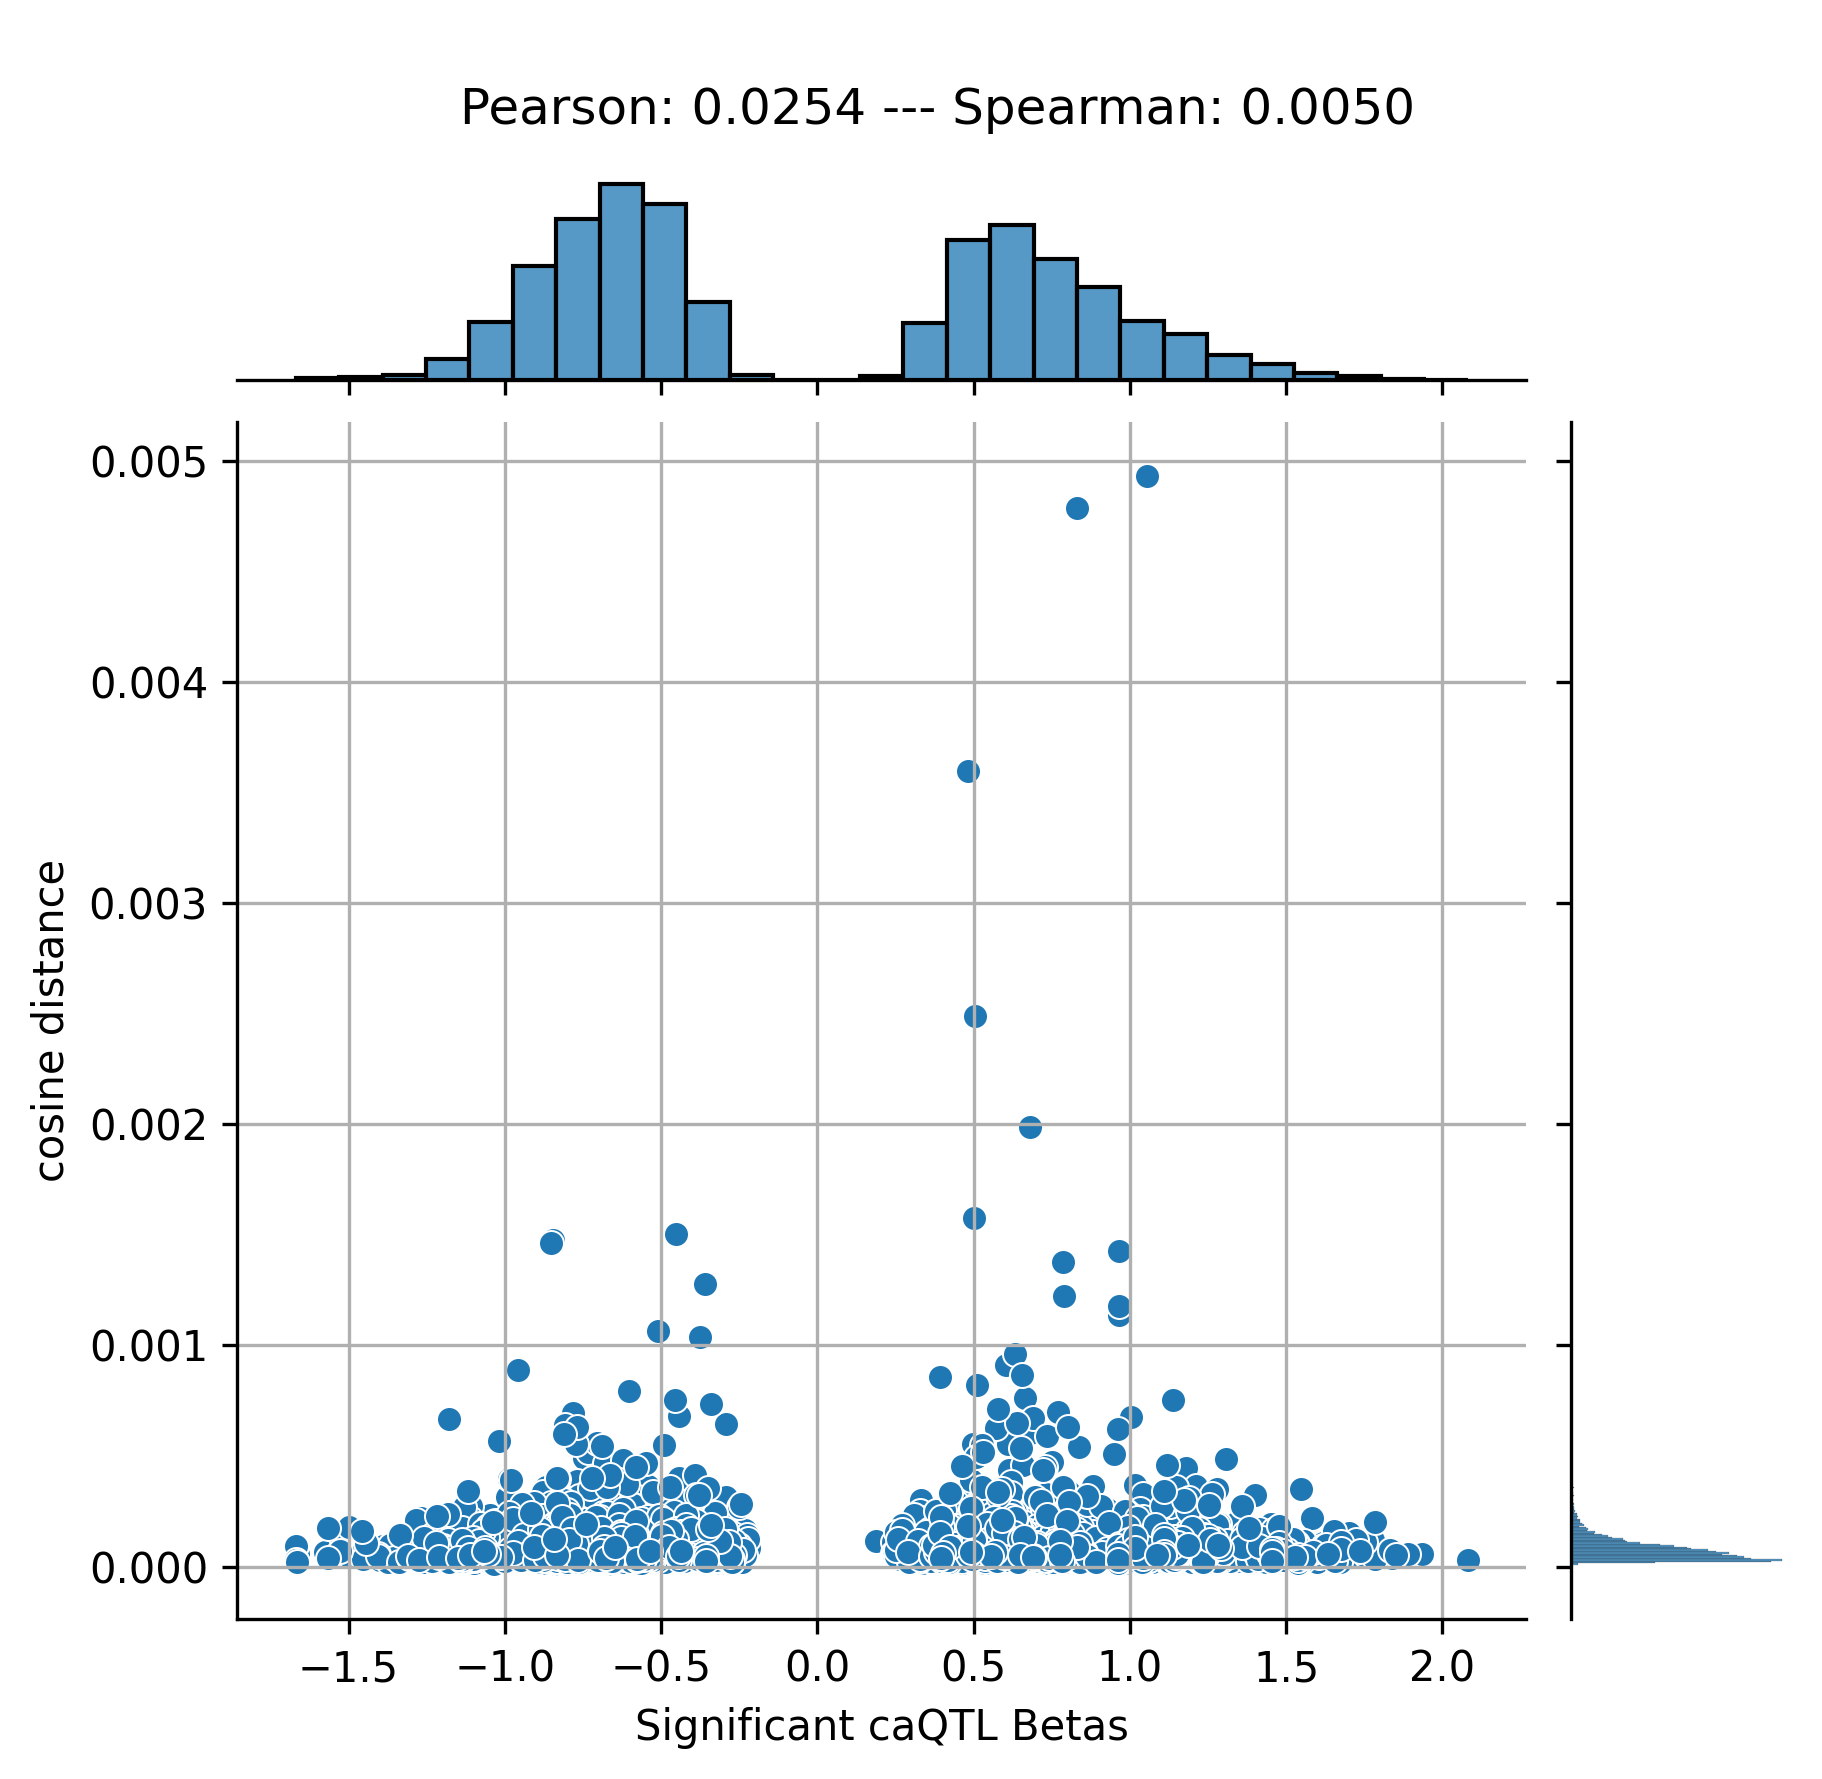

0.07689874855417242 0.4798687390462129 0.025439060890173594 0.005010780191759995
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.01278163217190406
Gena LM African Significant caQTLs


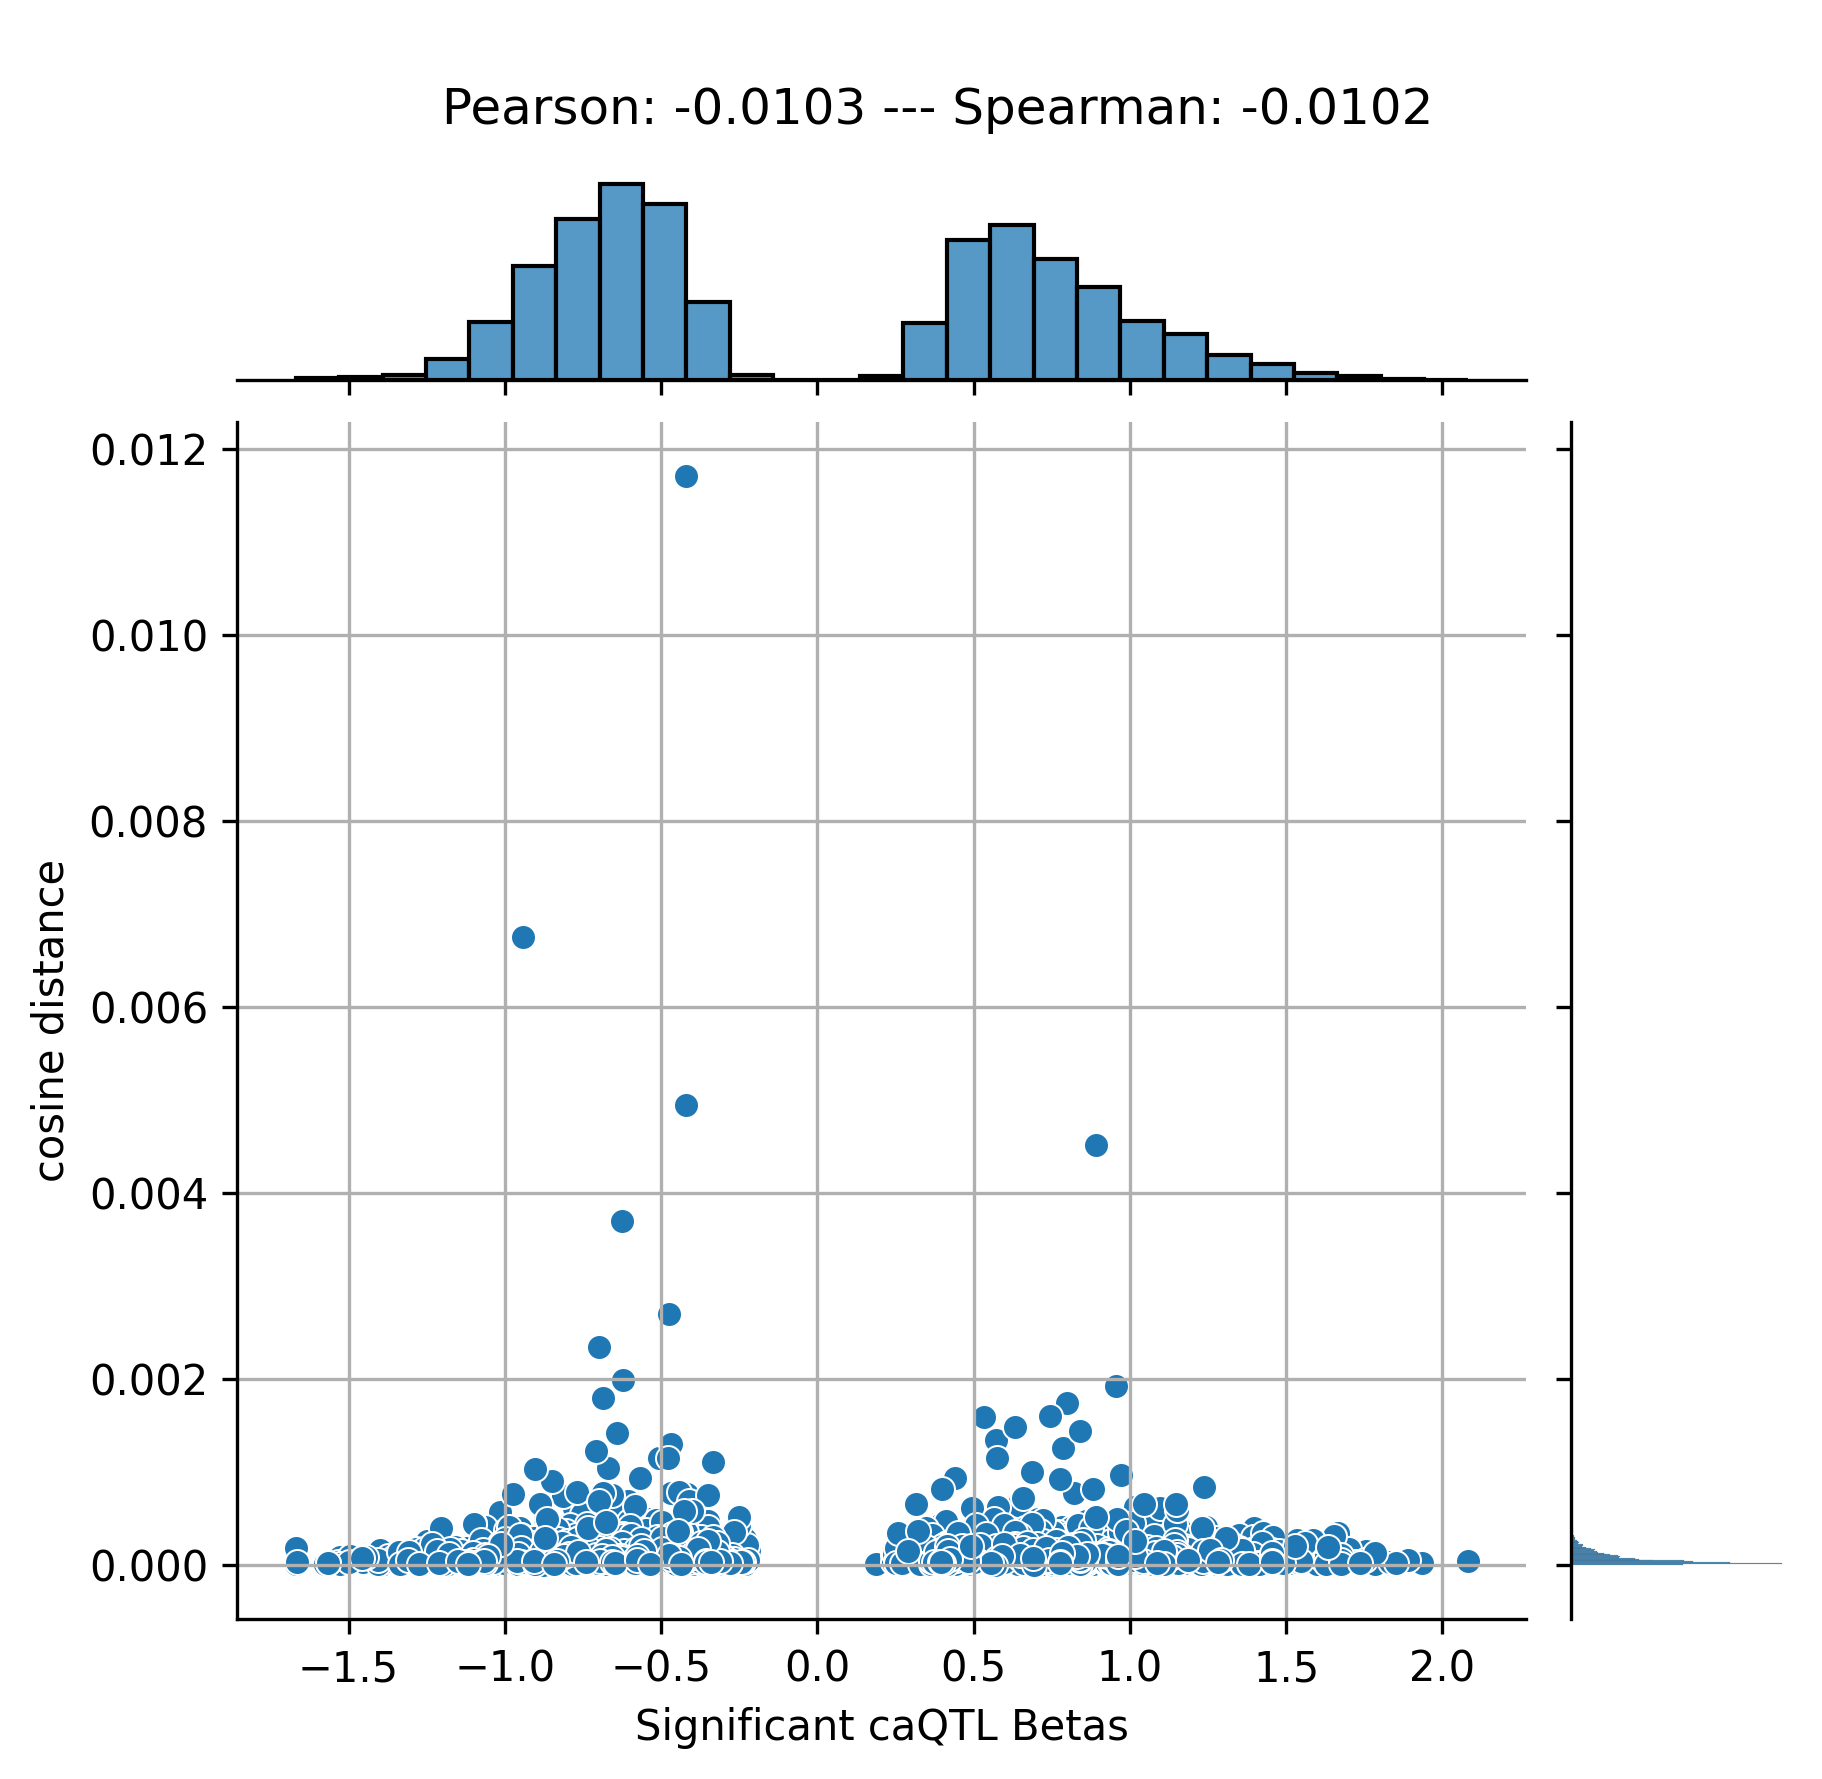

0.08509542549173738 0.5081384008511276 -0.010331444803036206 -0.010170860190818825
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.15931544573405e-05
HyenaDNA African Significant caQTLs


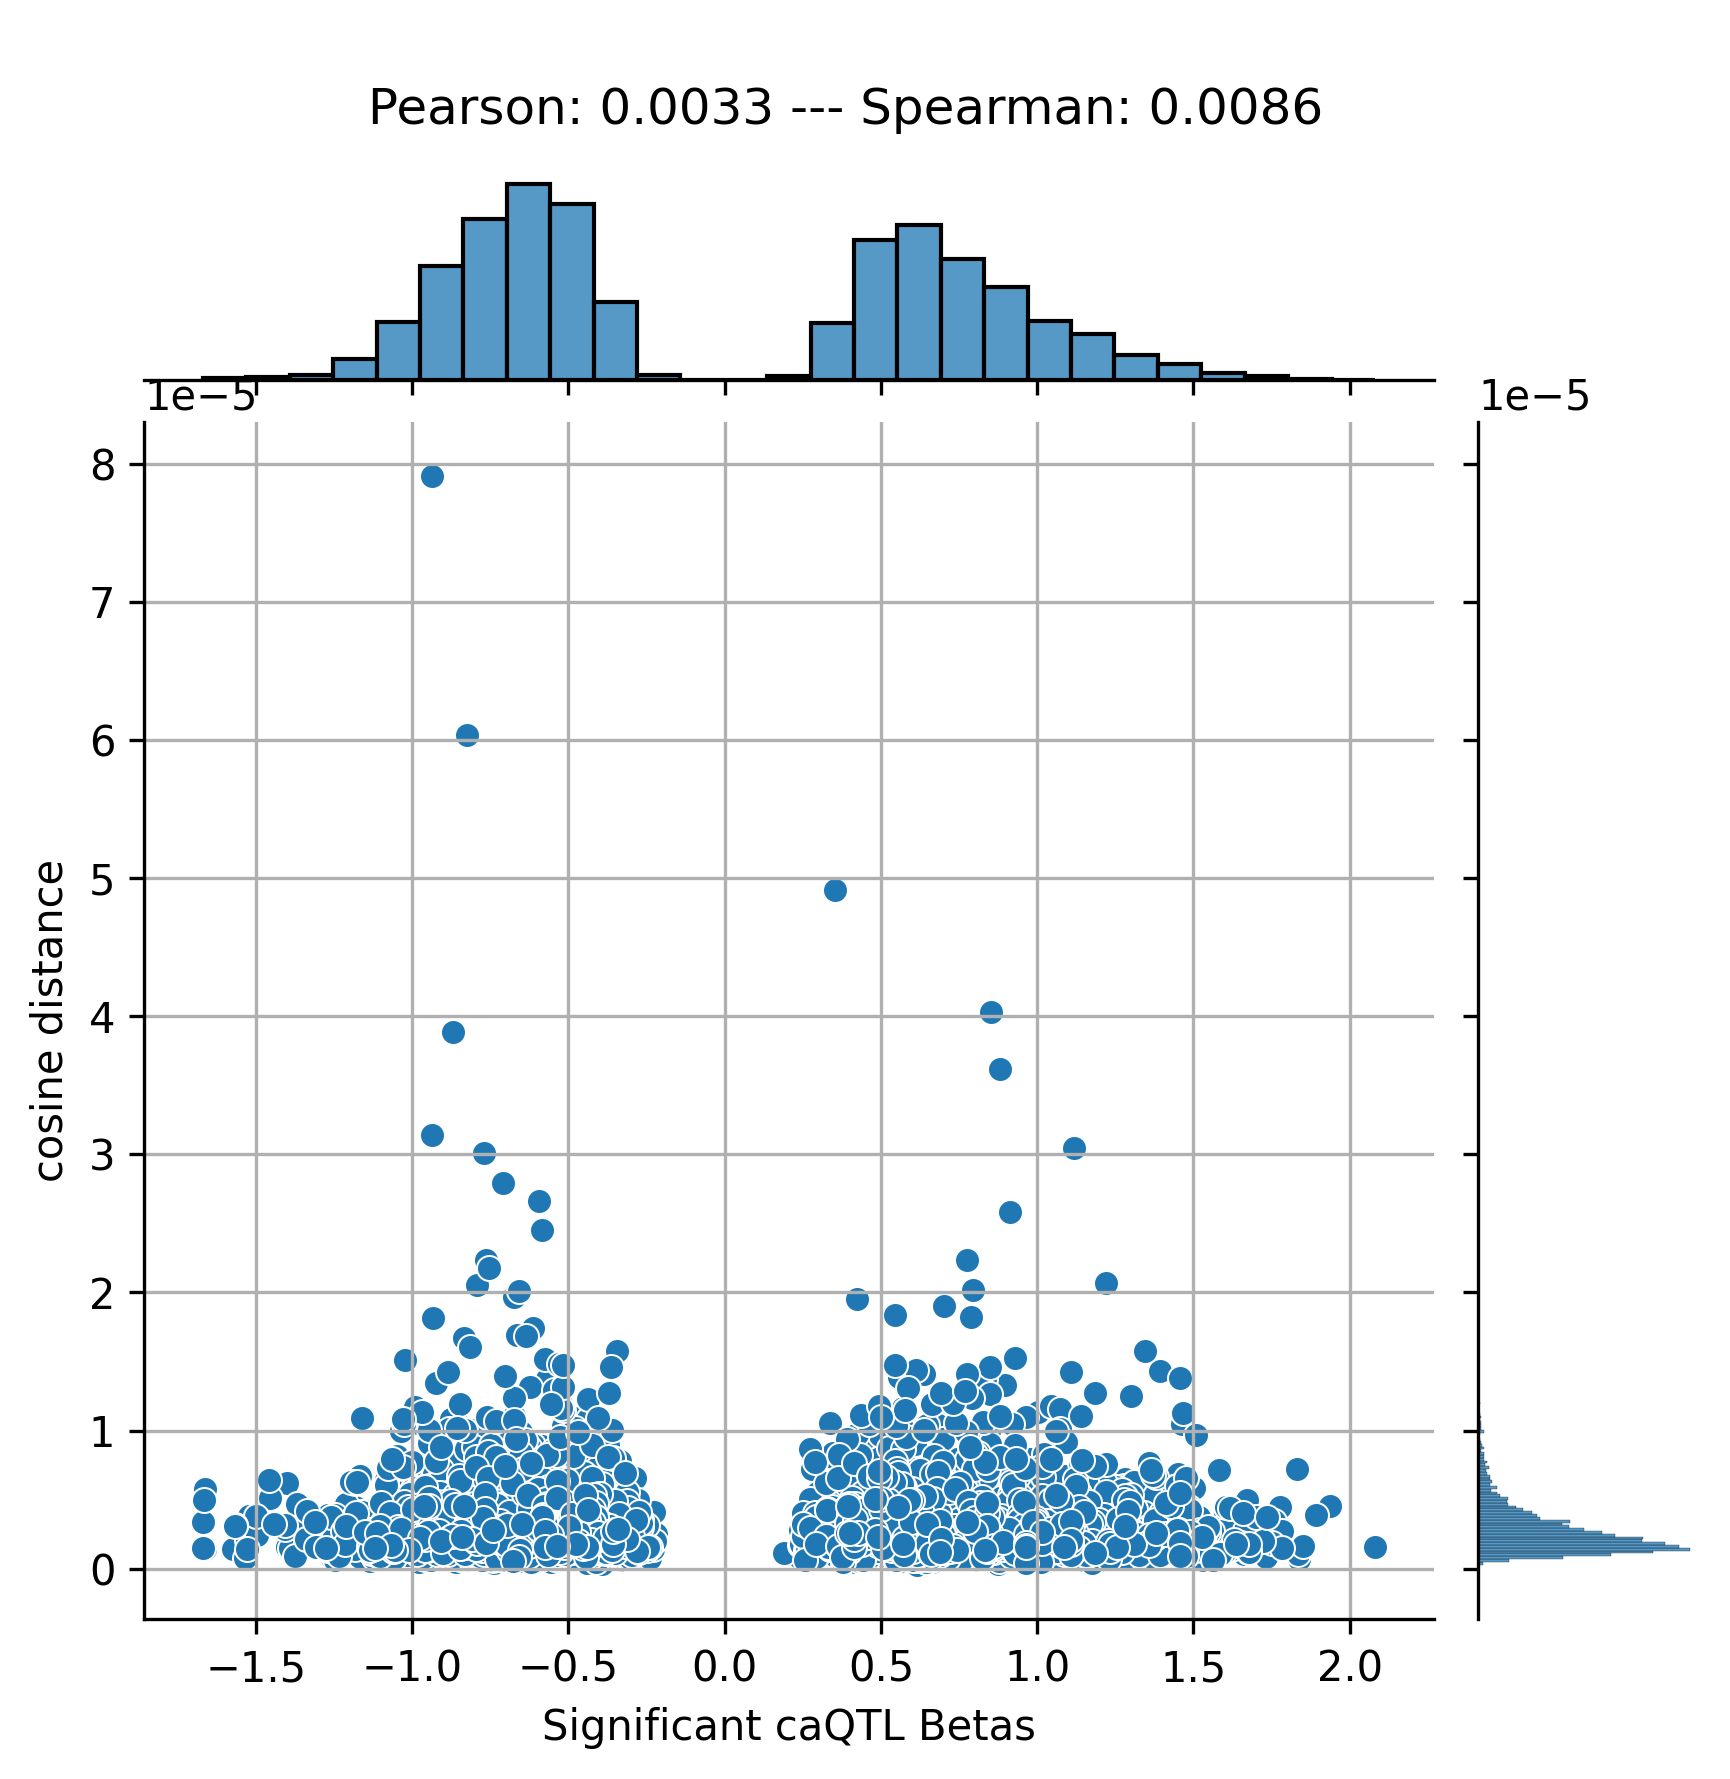

0.08507675427111616 0.5154246119850056 0.003269013667316209 0.00858298834524173
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.8433071587166782e-07
Nucleotide Transformer African Significant caQTLs


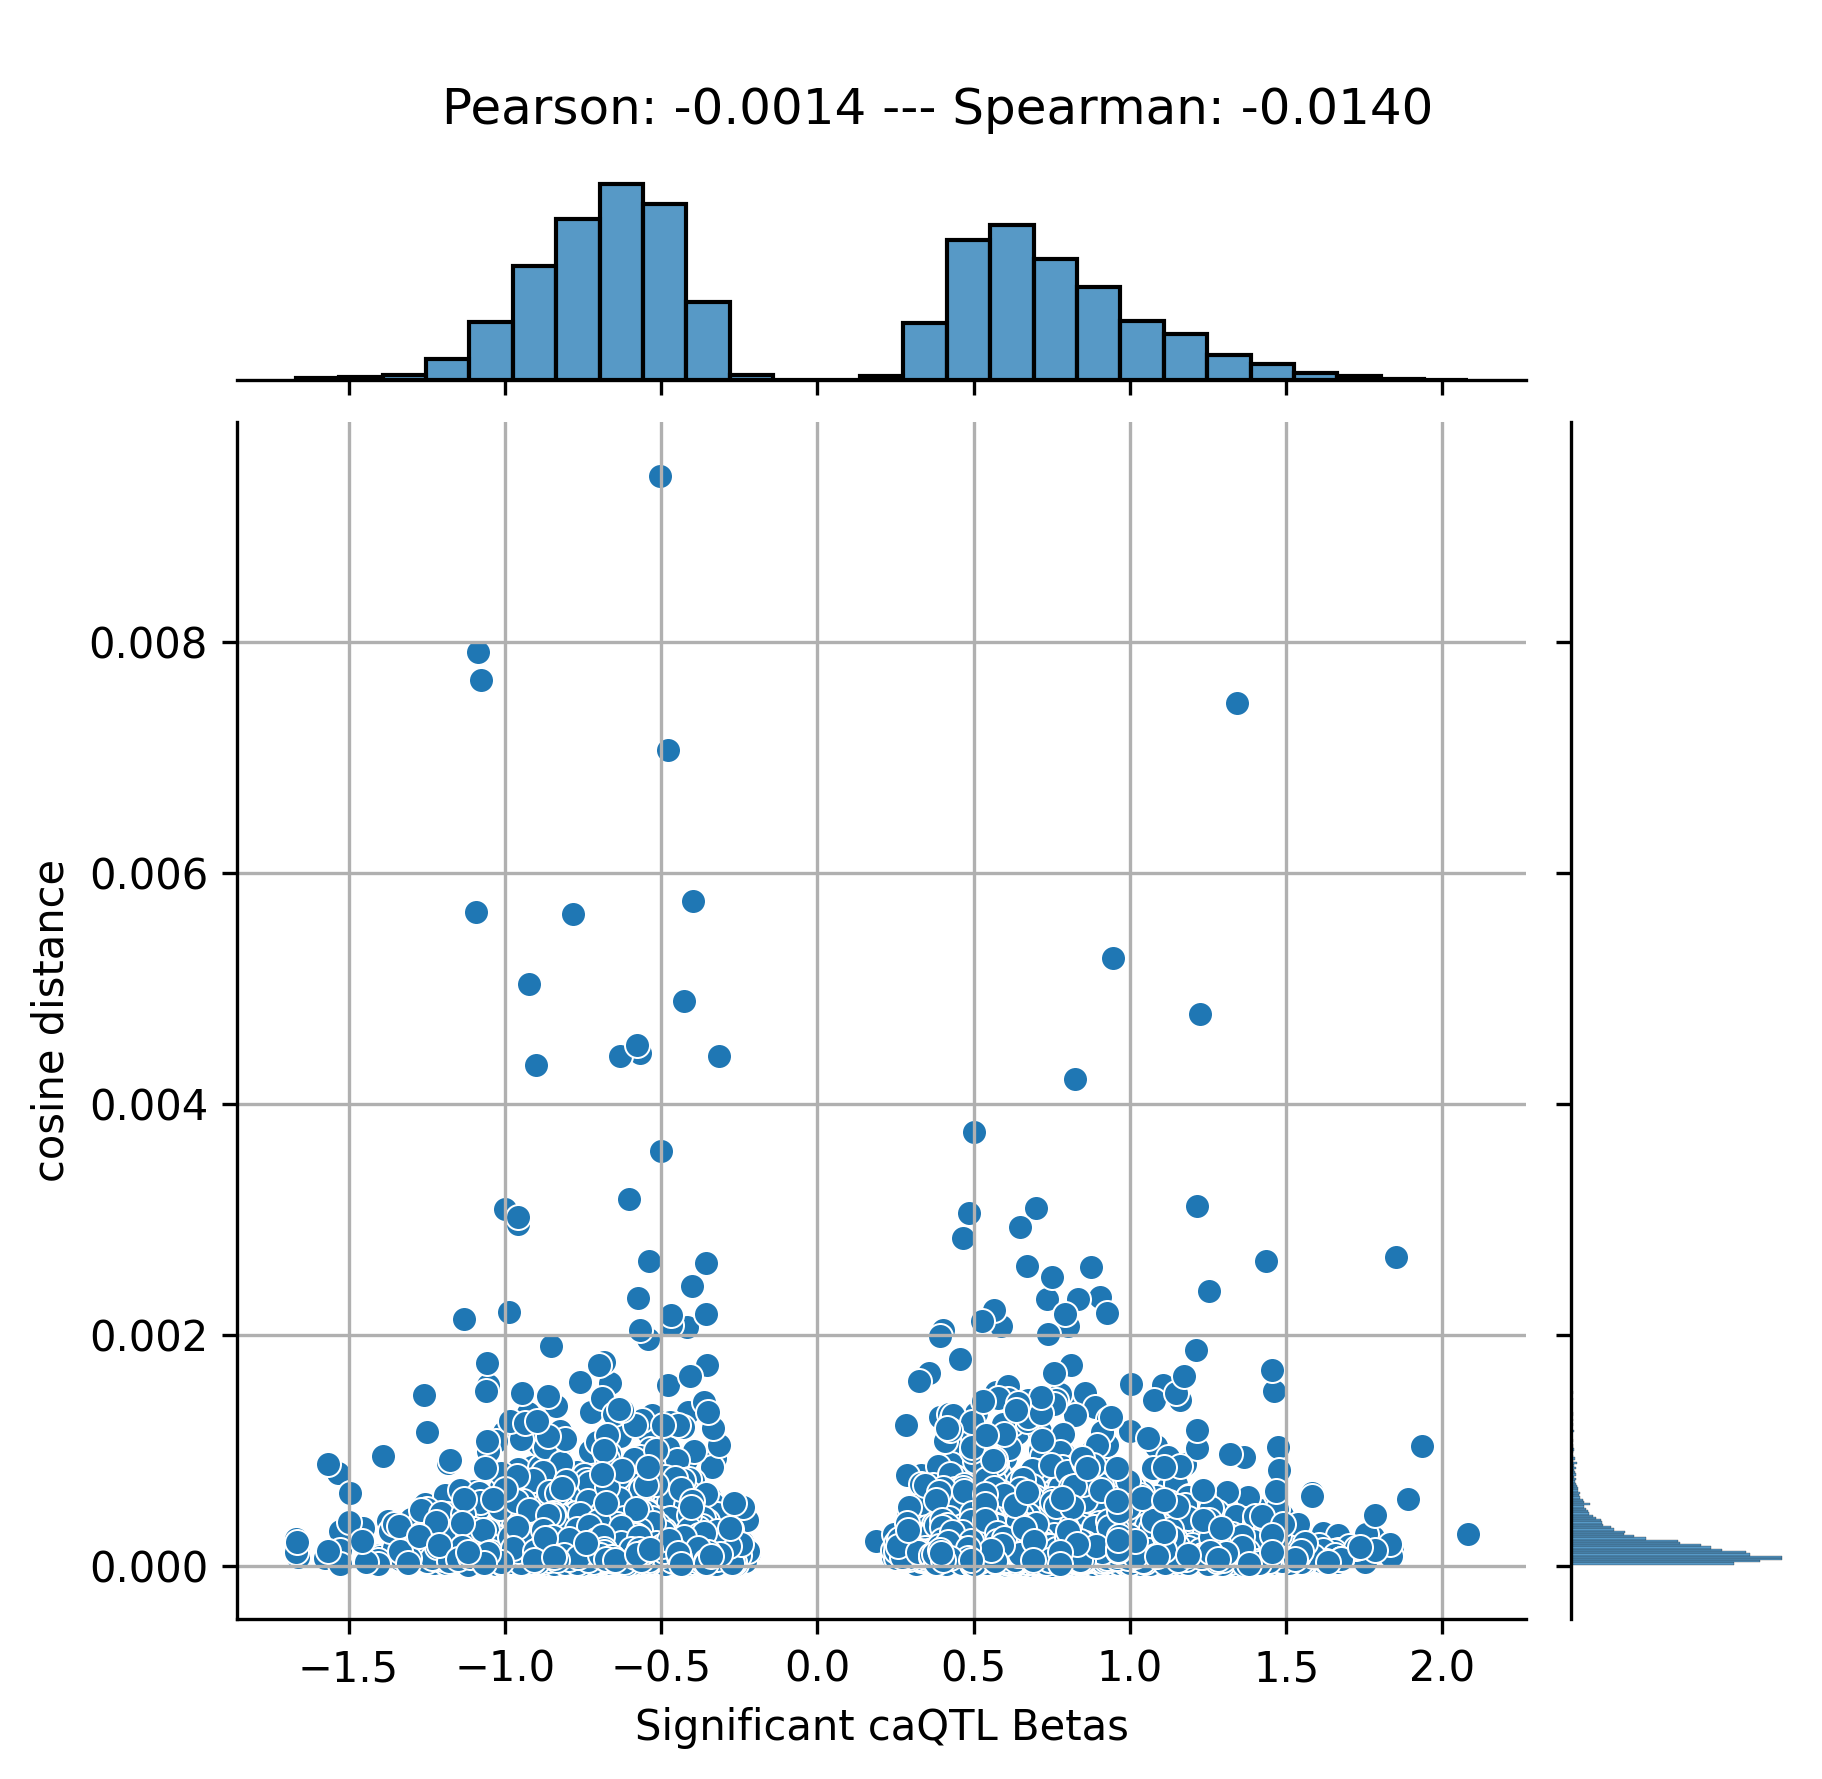

0.08632229304323812 0.5185326666729057 -0.001415211614474967 -0.013993883073333371
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.5139708476493737e-08
Mistral DNA African Significant caQTLs


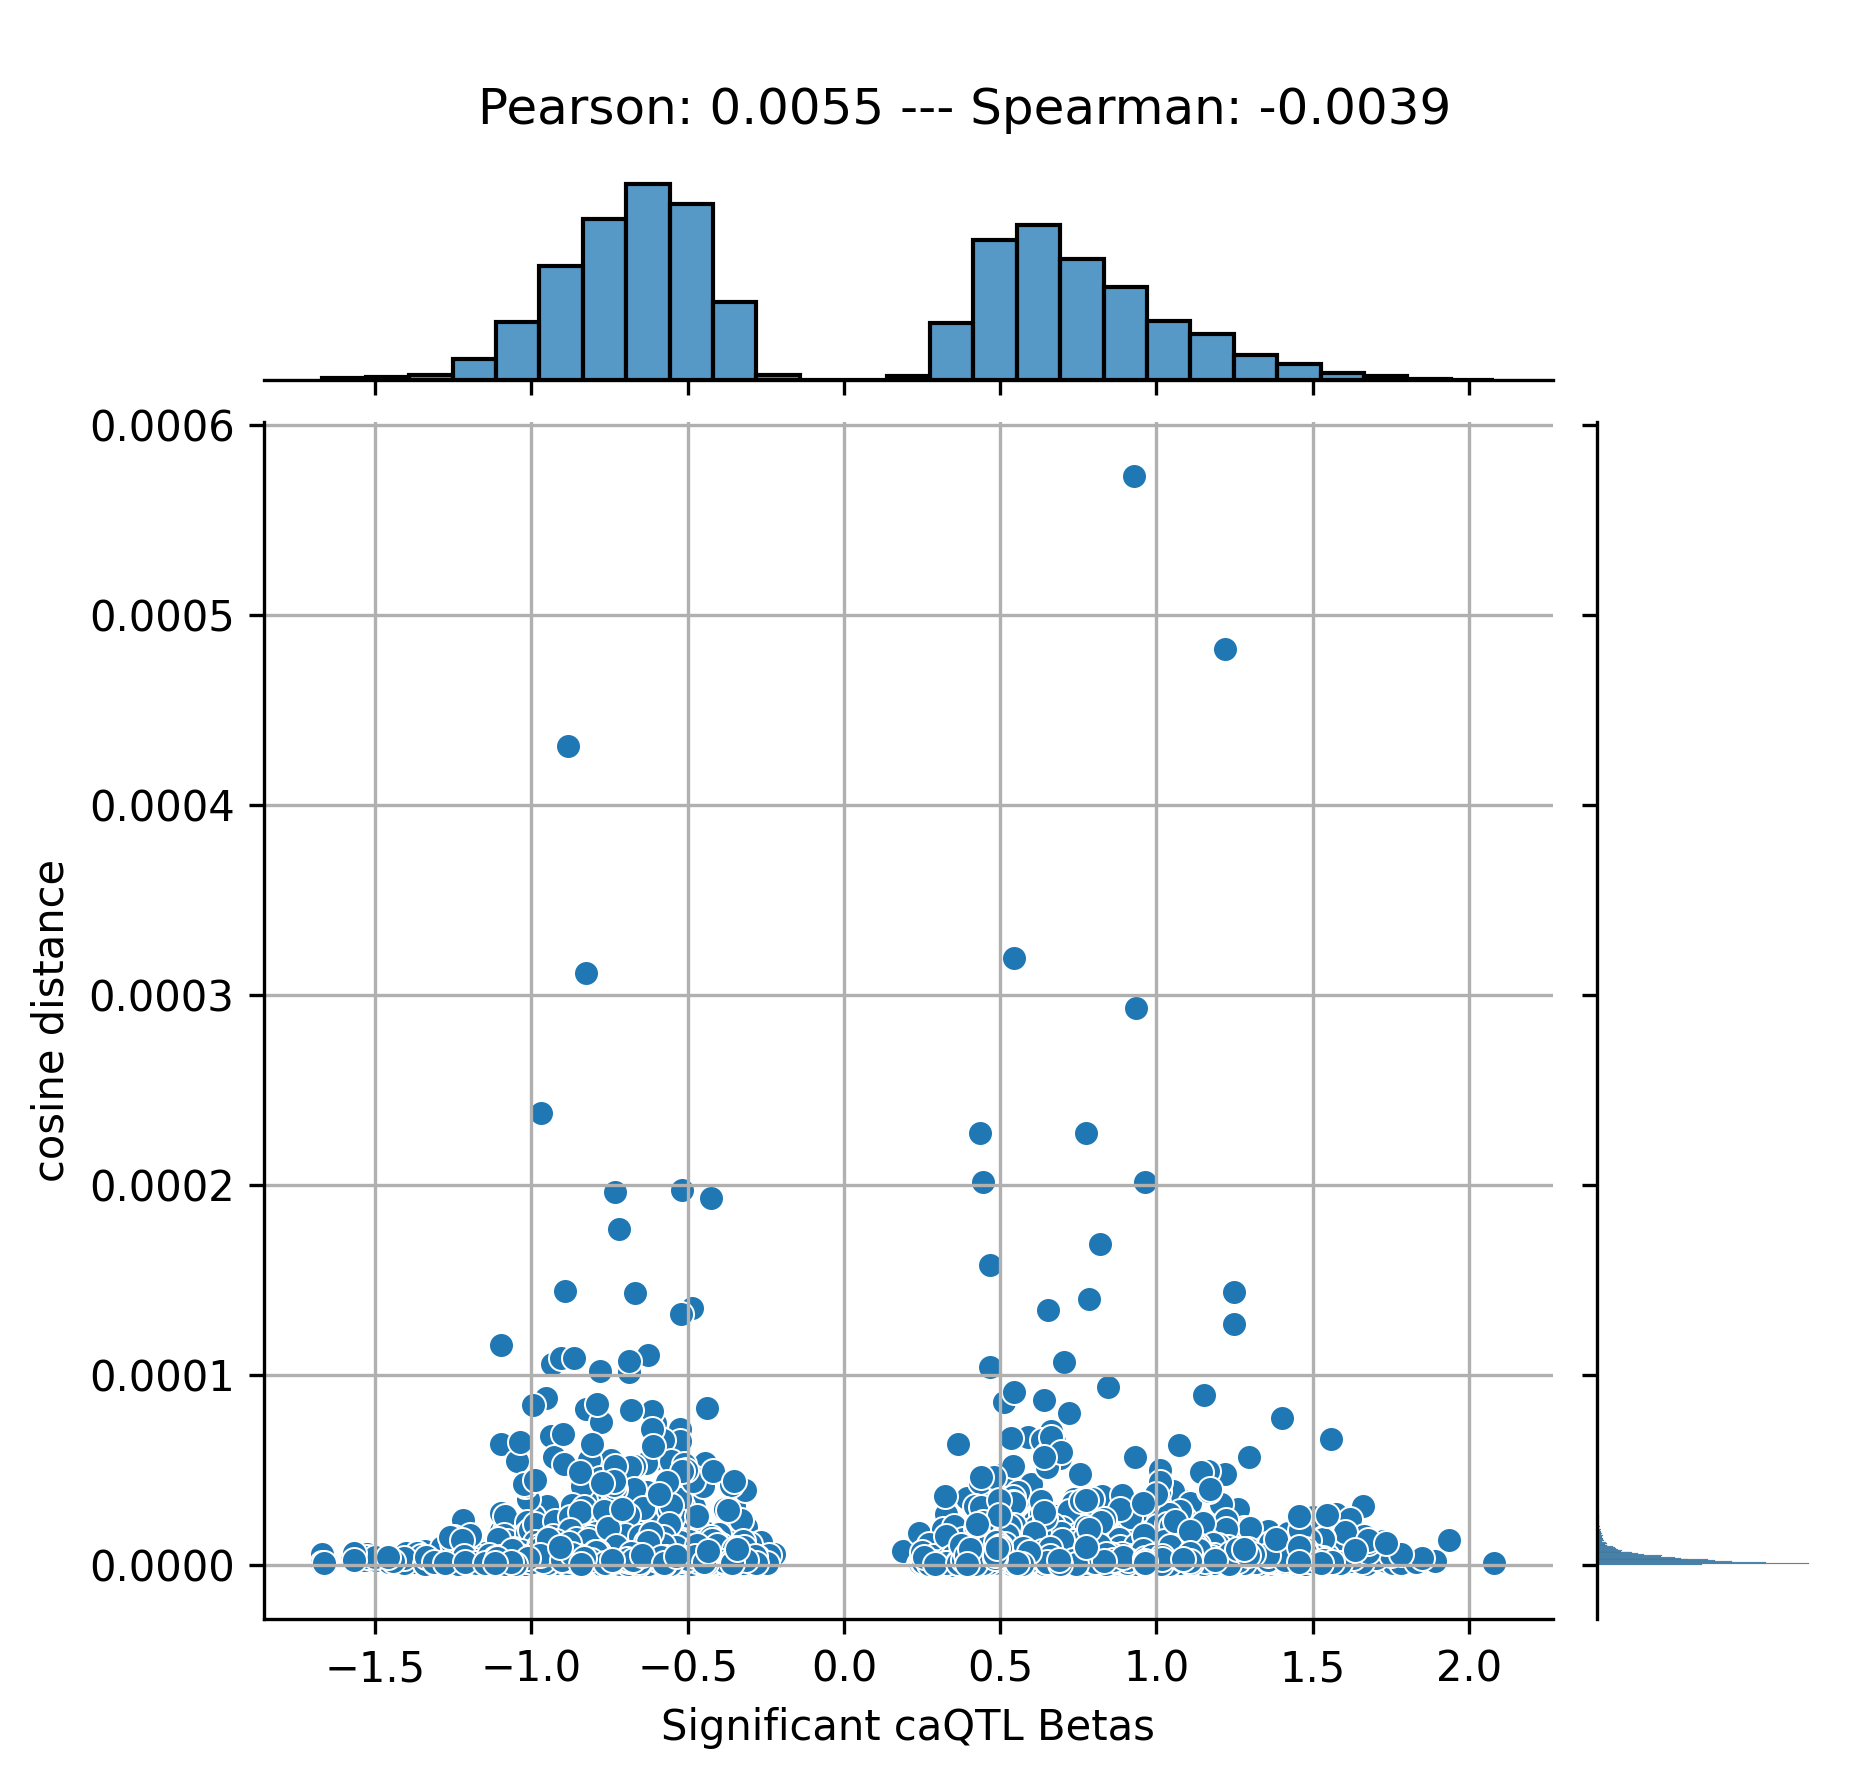

0.08873792494093868 0.5201923880104027 0.0054917251363113965 -0.003879004567455401
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 8.944373437927844e-08
Caduceus African Significant caQTLs


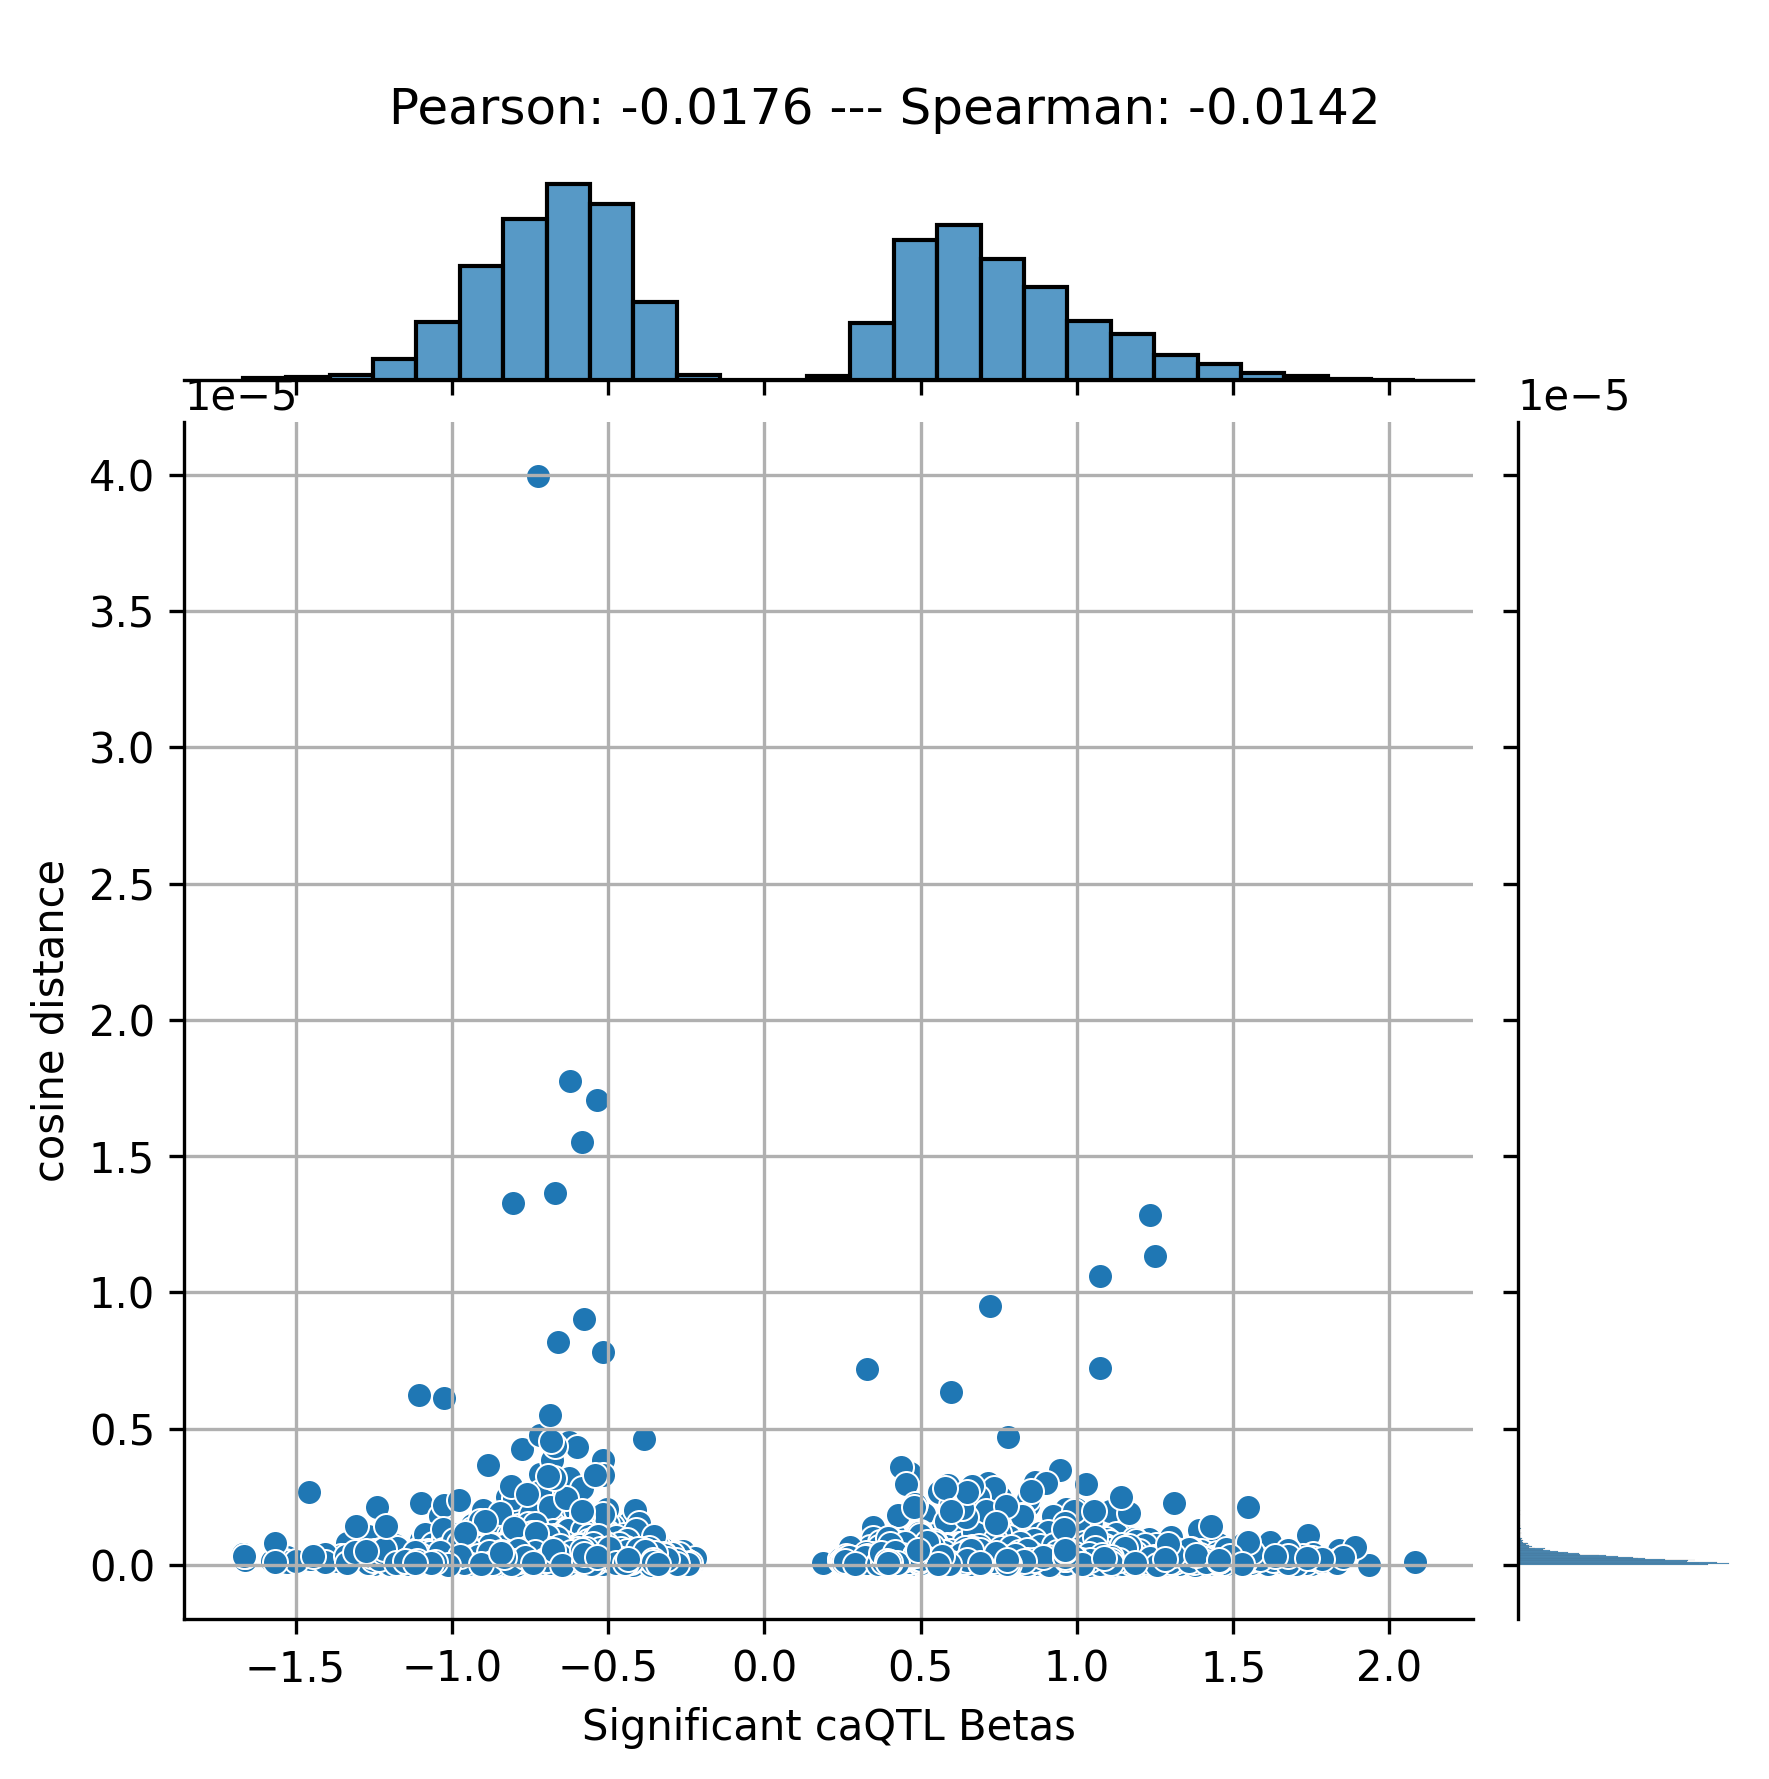

0.08706302406255131 0.5190268162836373 -0.017563925848565767 -0.014249461969516212
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
DNABert2 Yoruba Significant dsQTLs


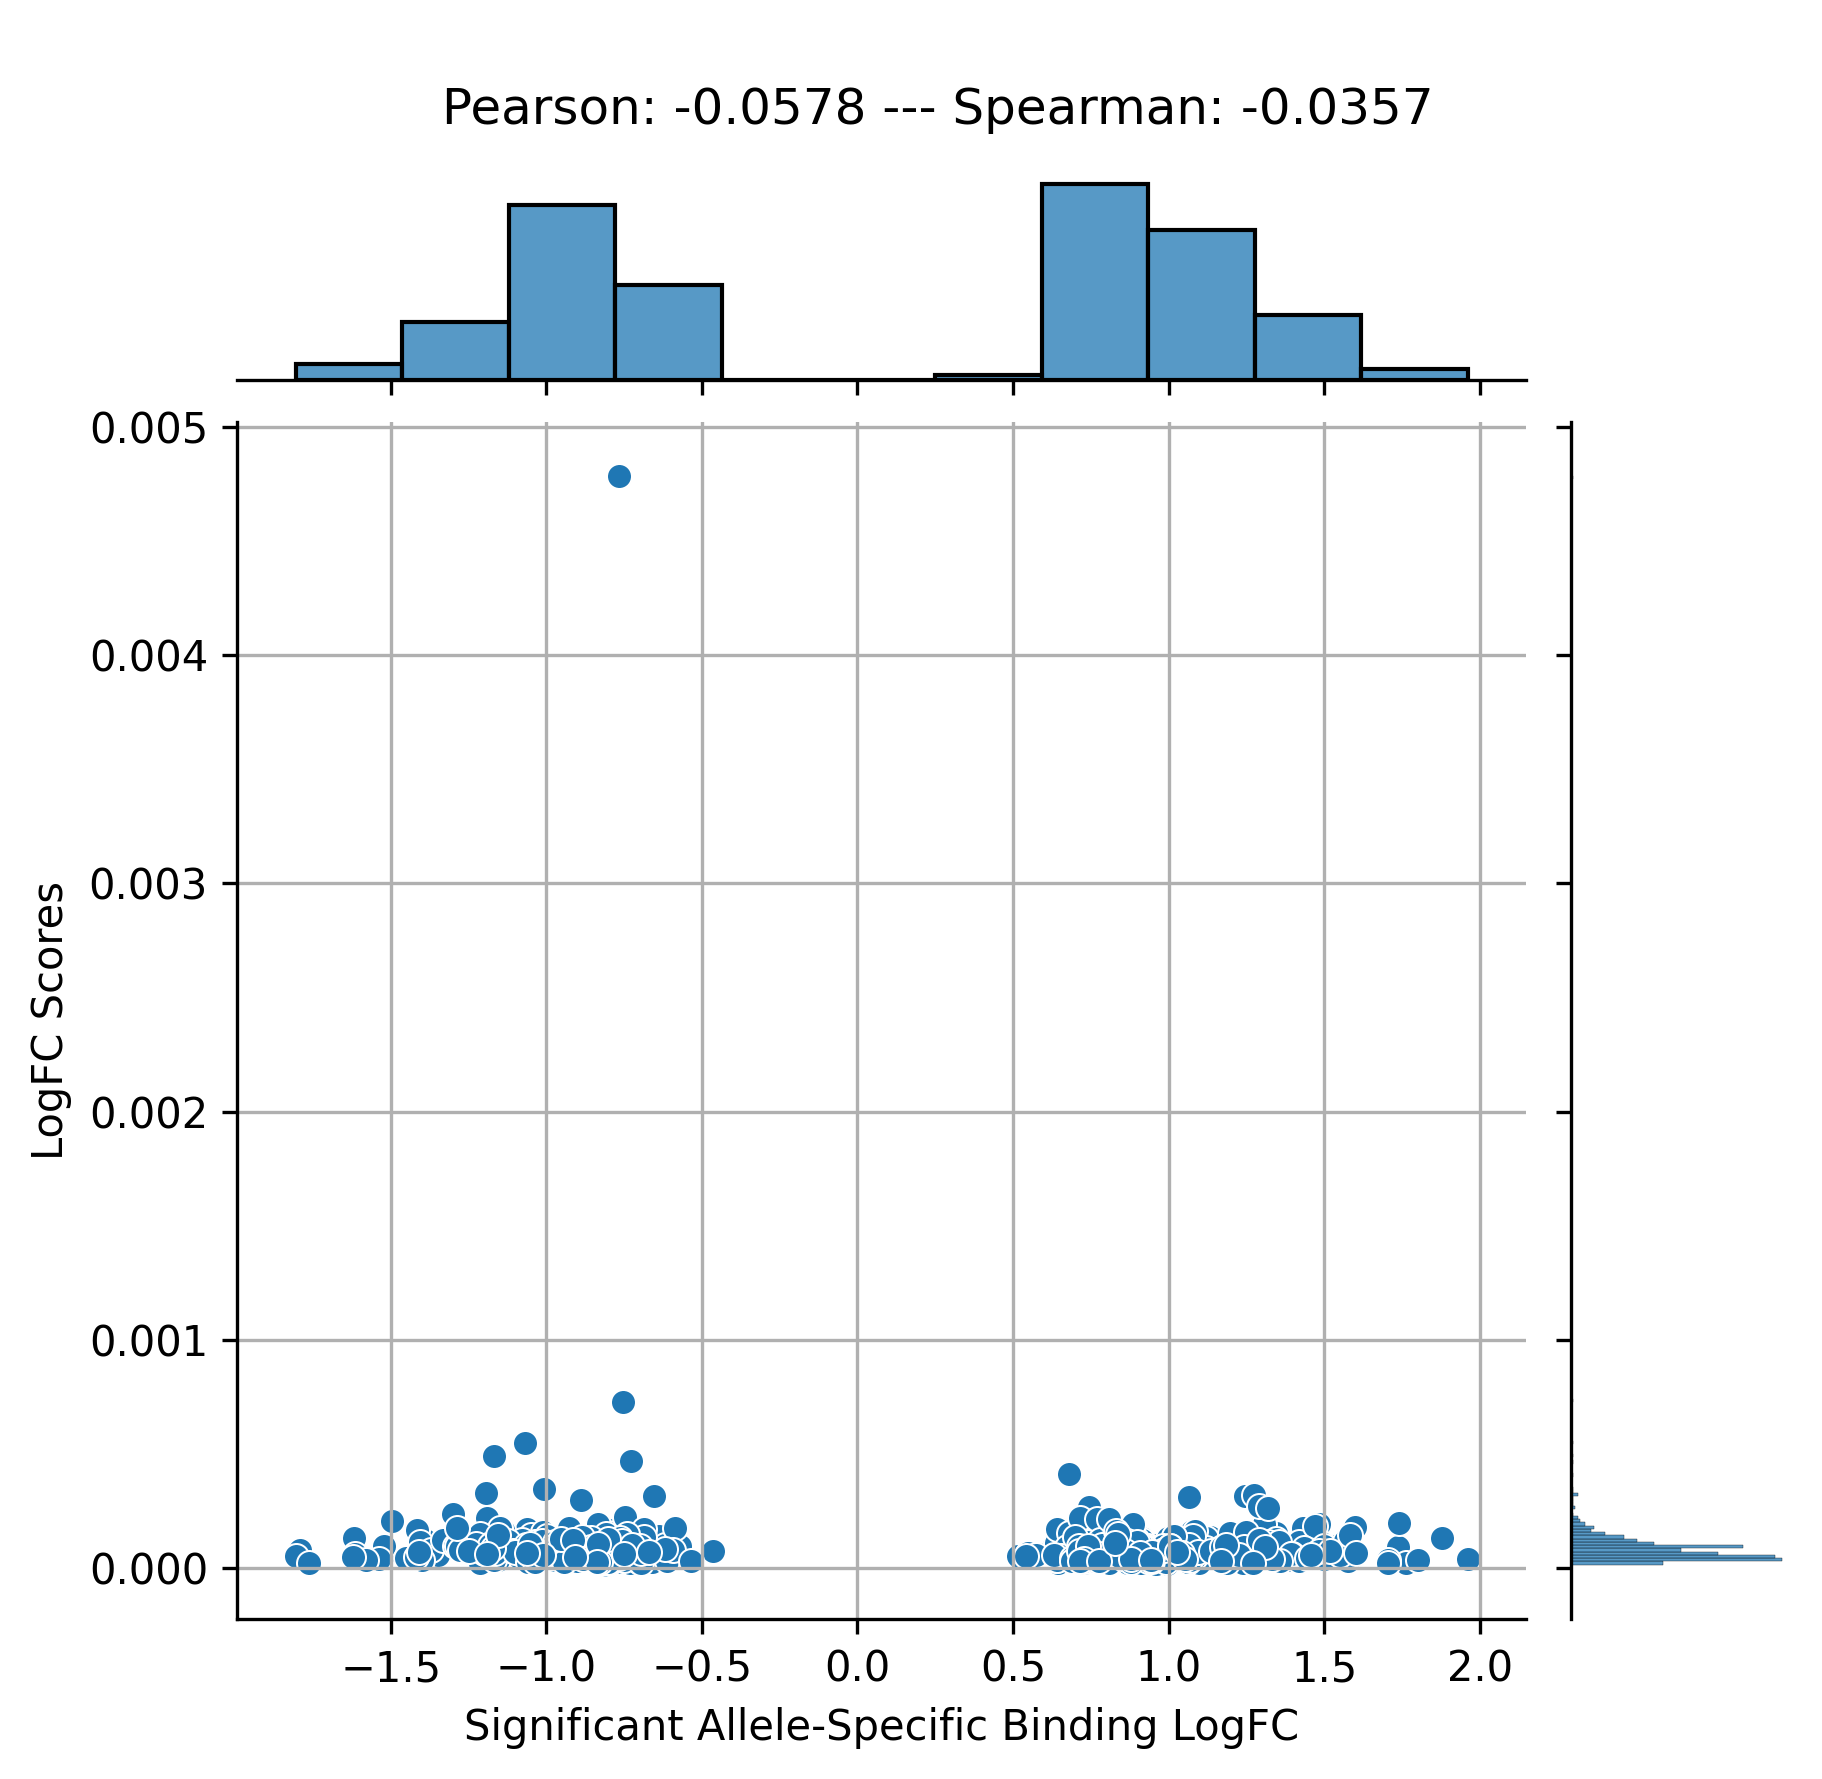

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Gena LM Yoruba Significant dsQTLs


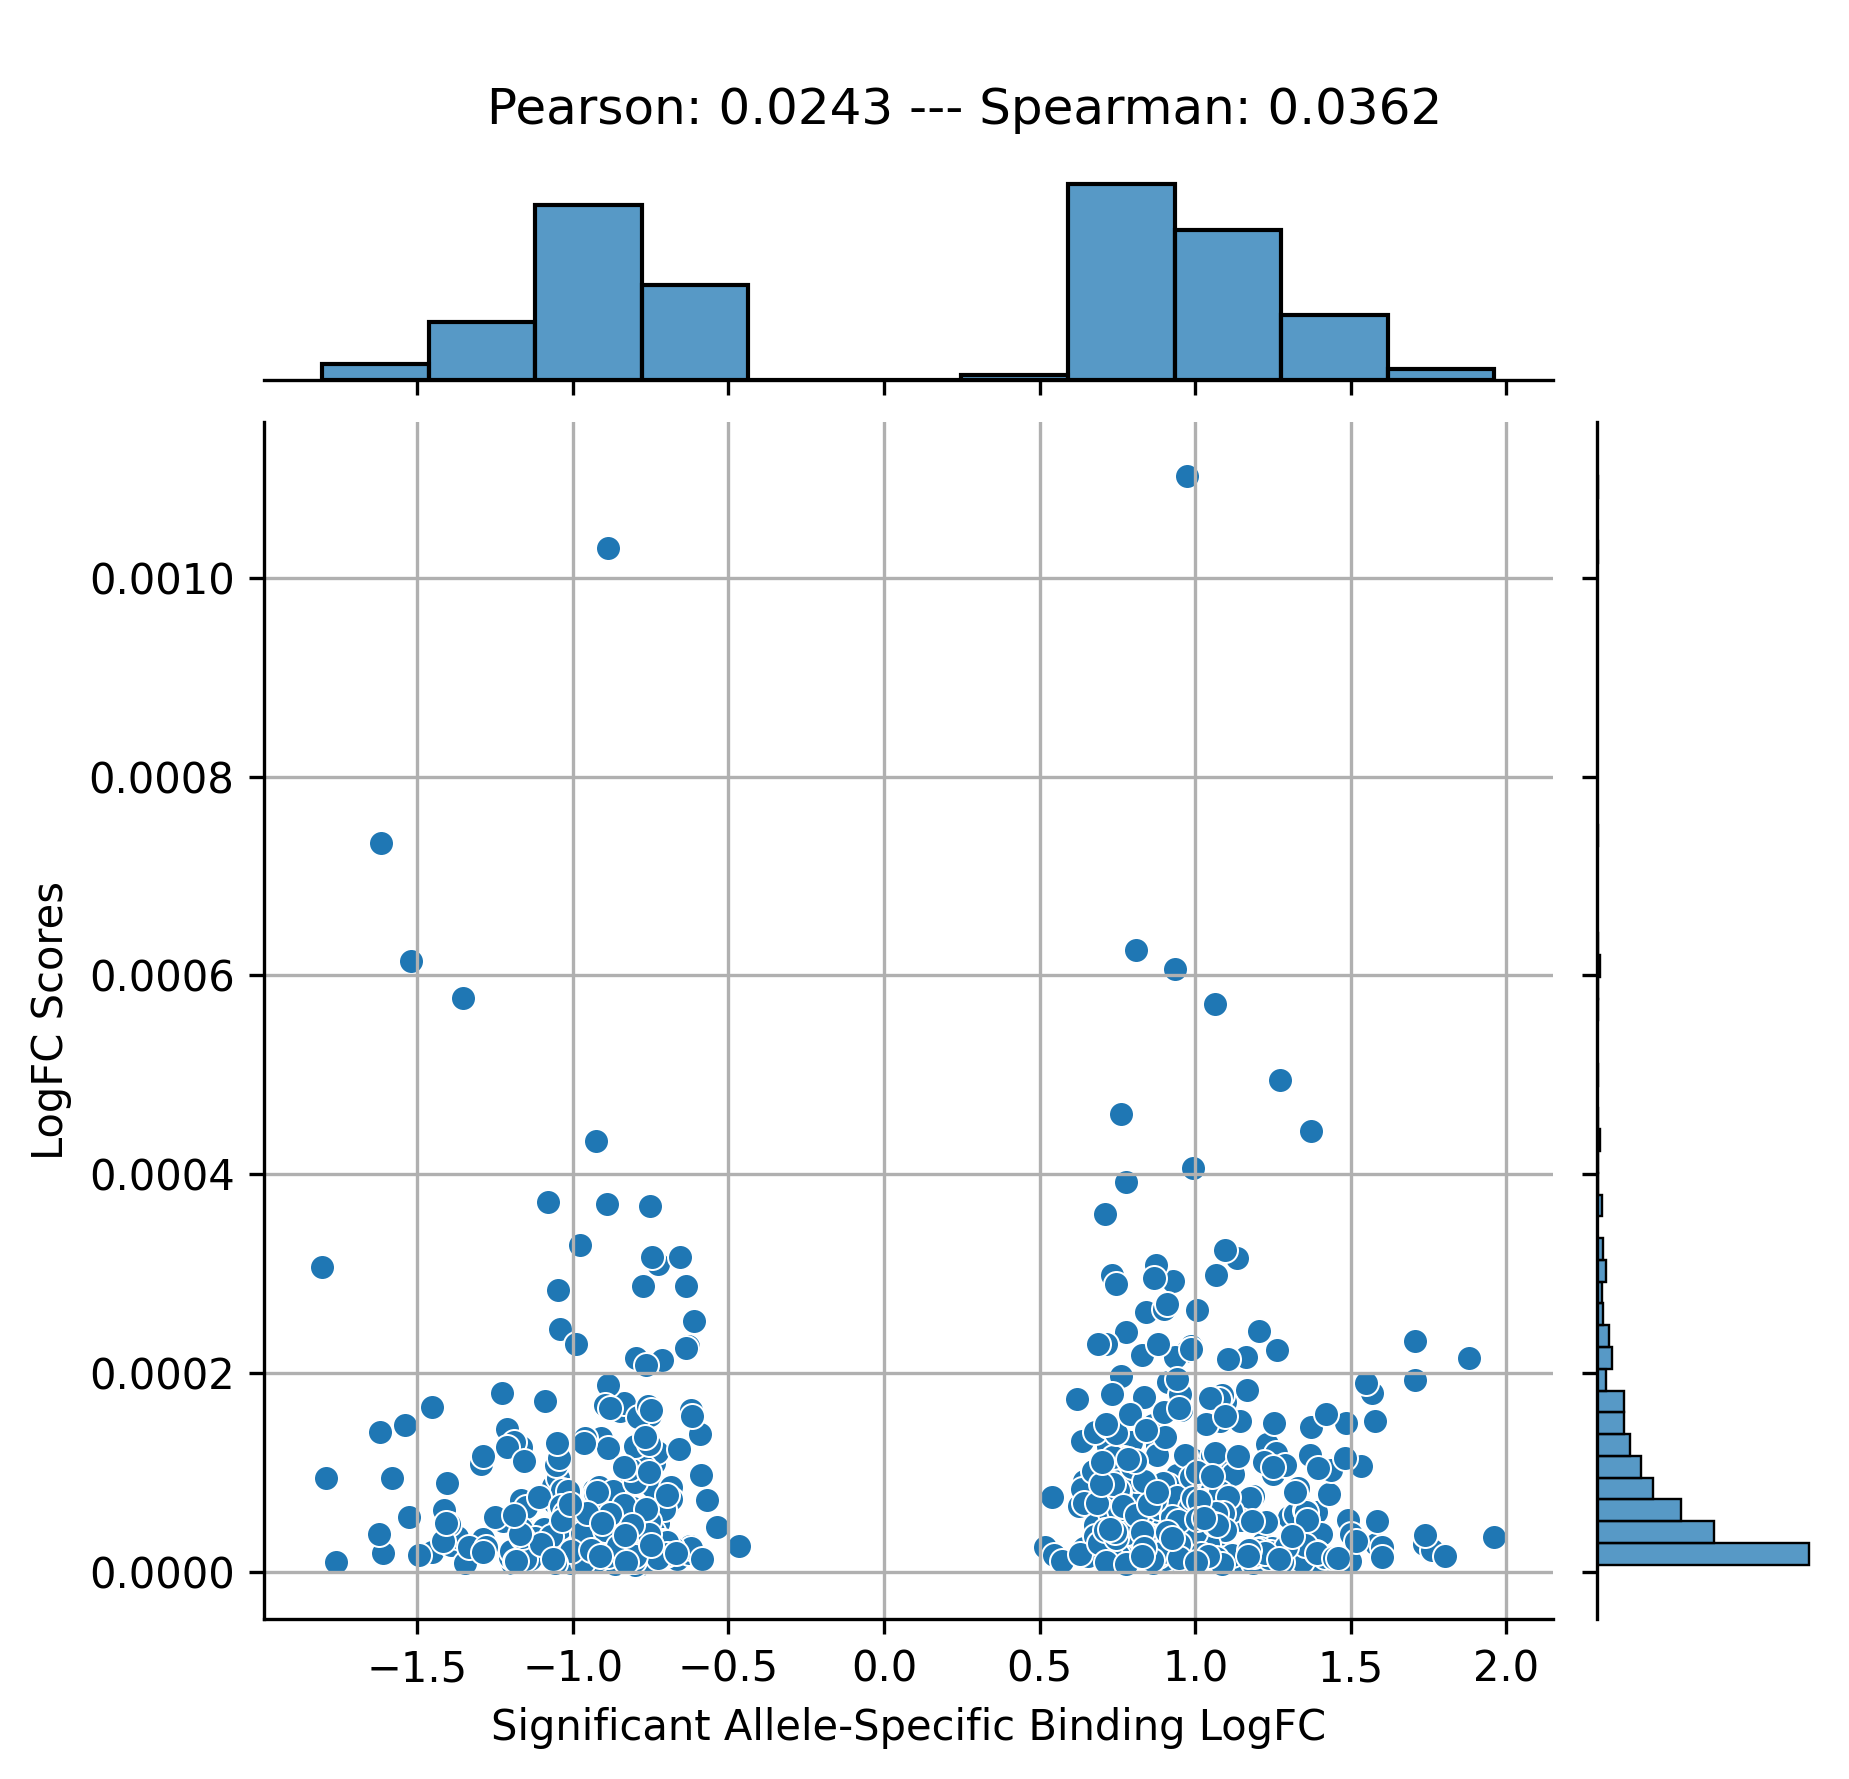

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
HyenaDNA Yoruba Significant dsQTLs


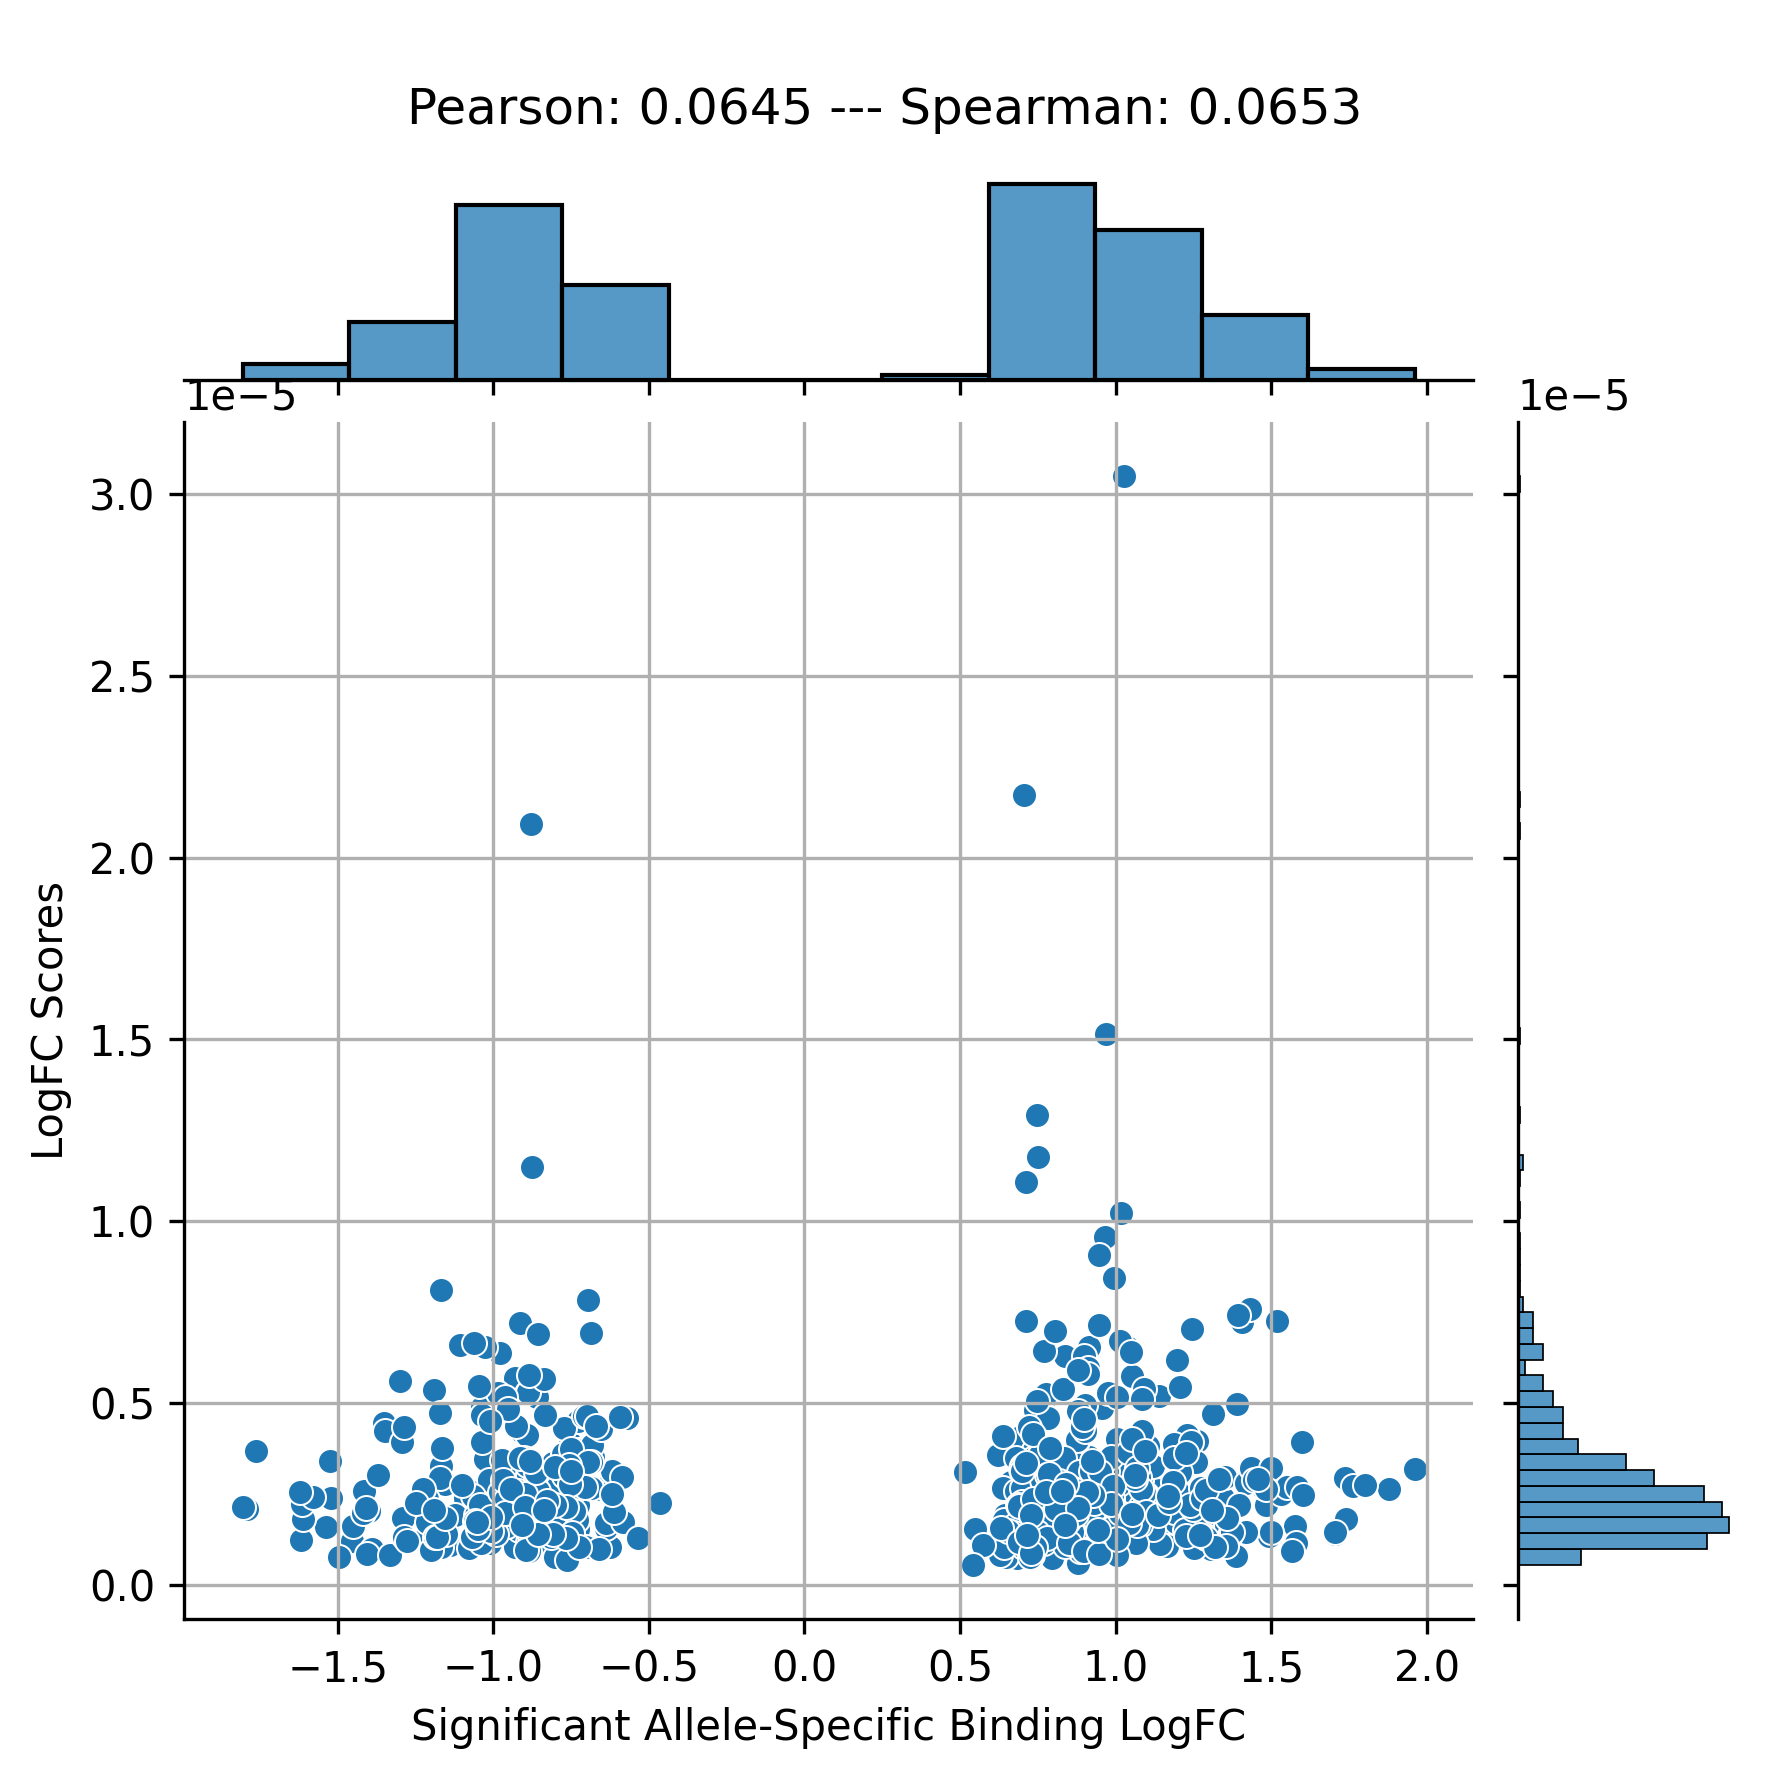

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Nucleotide Transformer Yoruba Significant dsQTLs


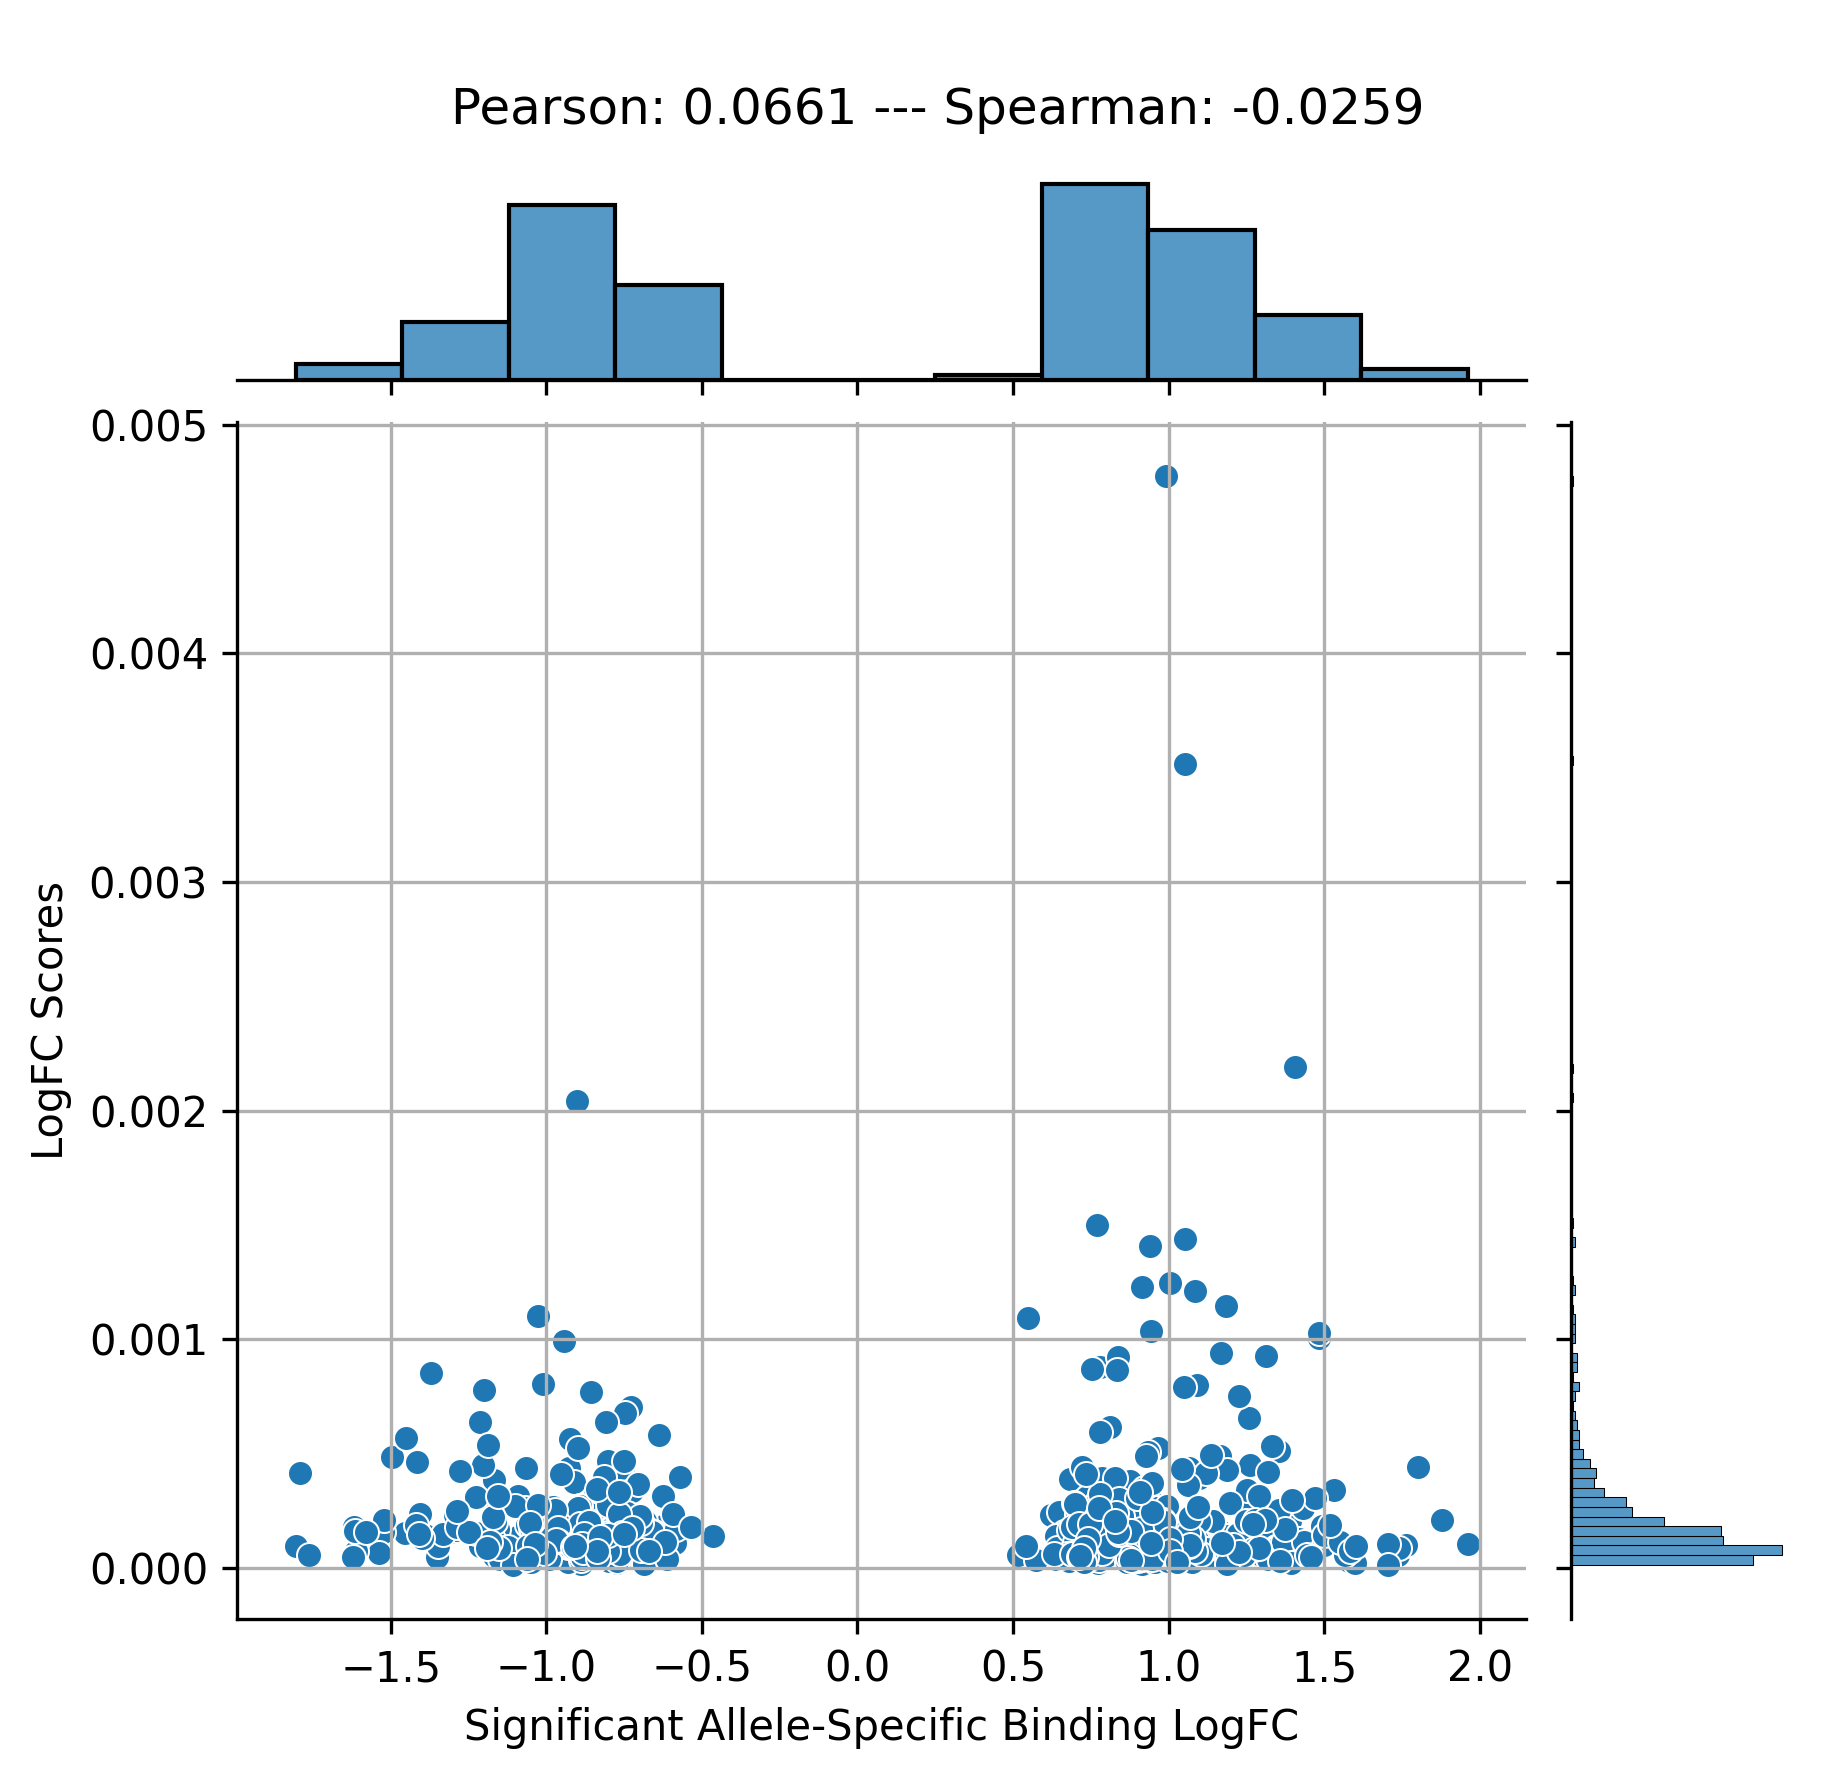

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Mistral DNA Yoruba Significant dsQTLs


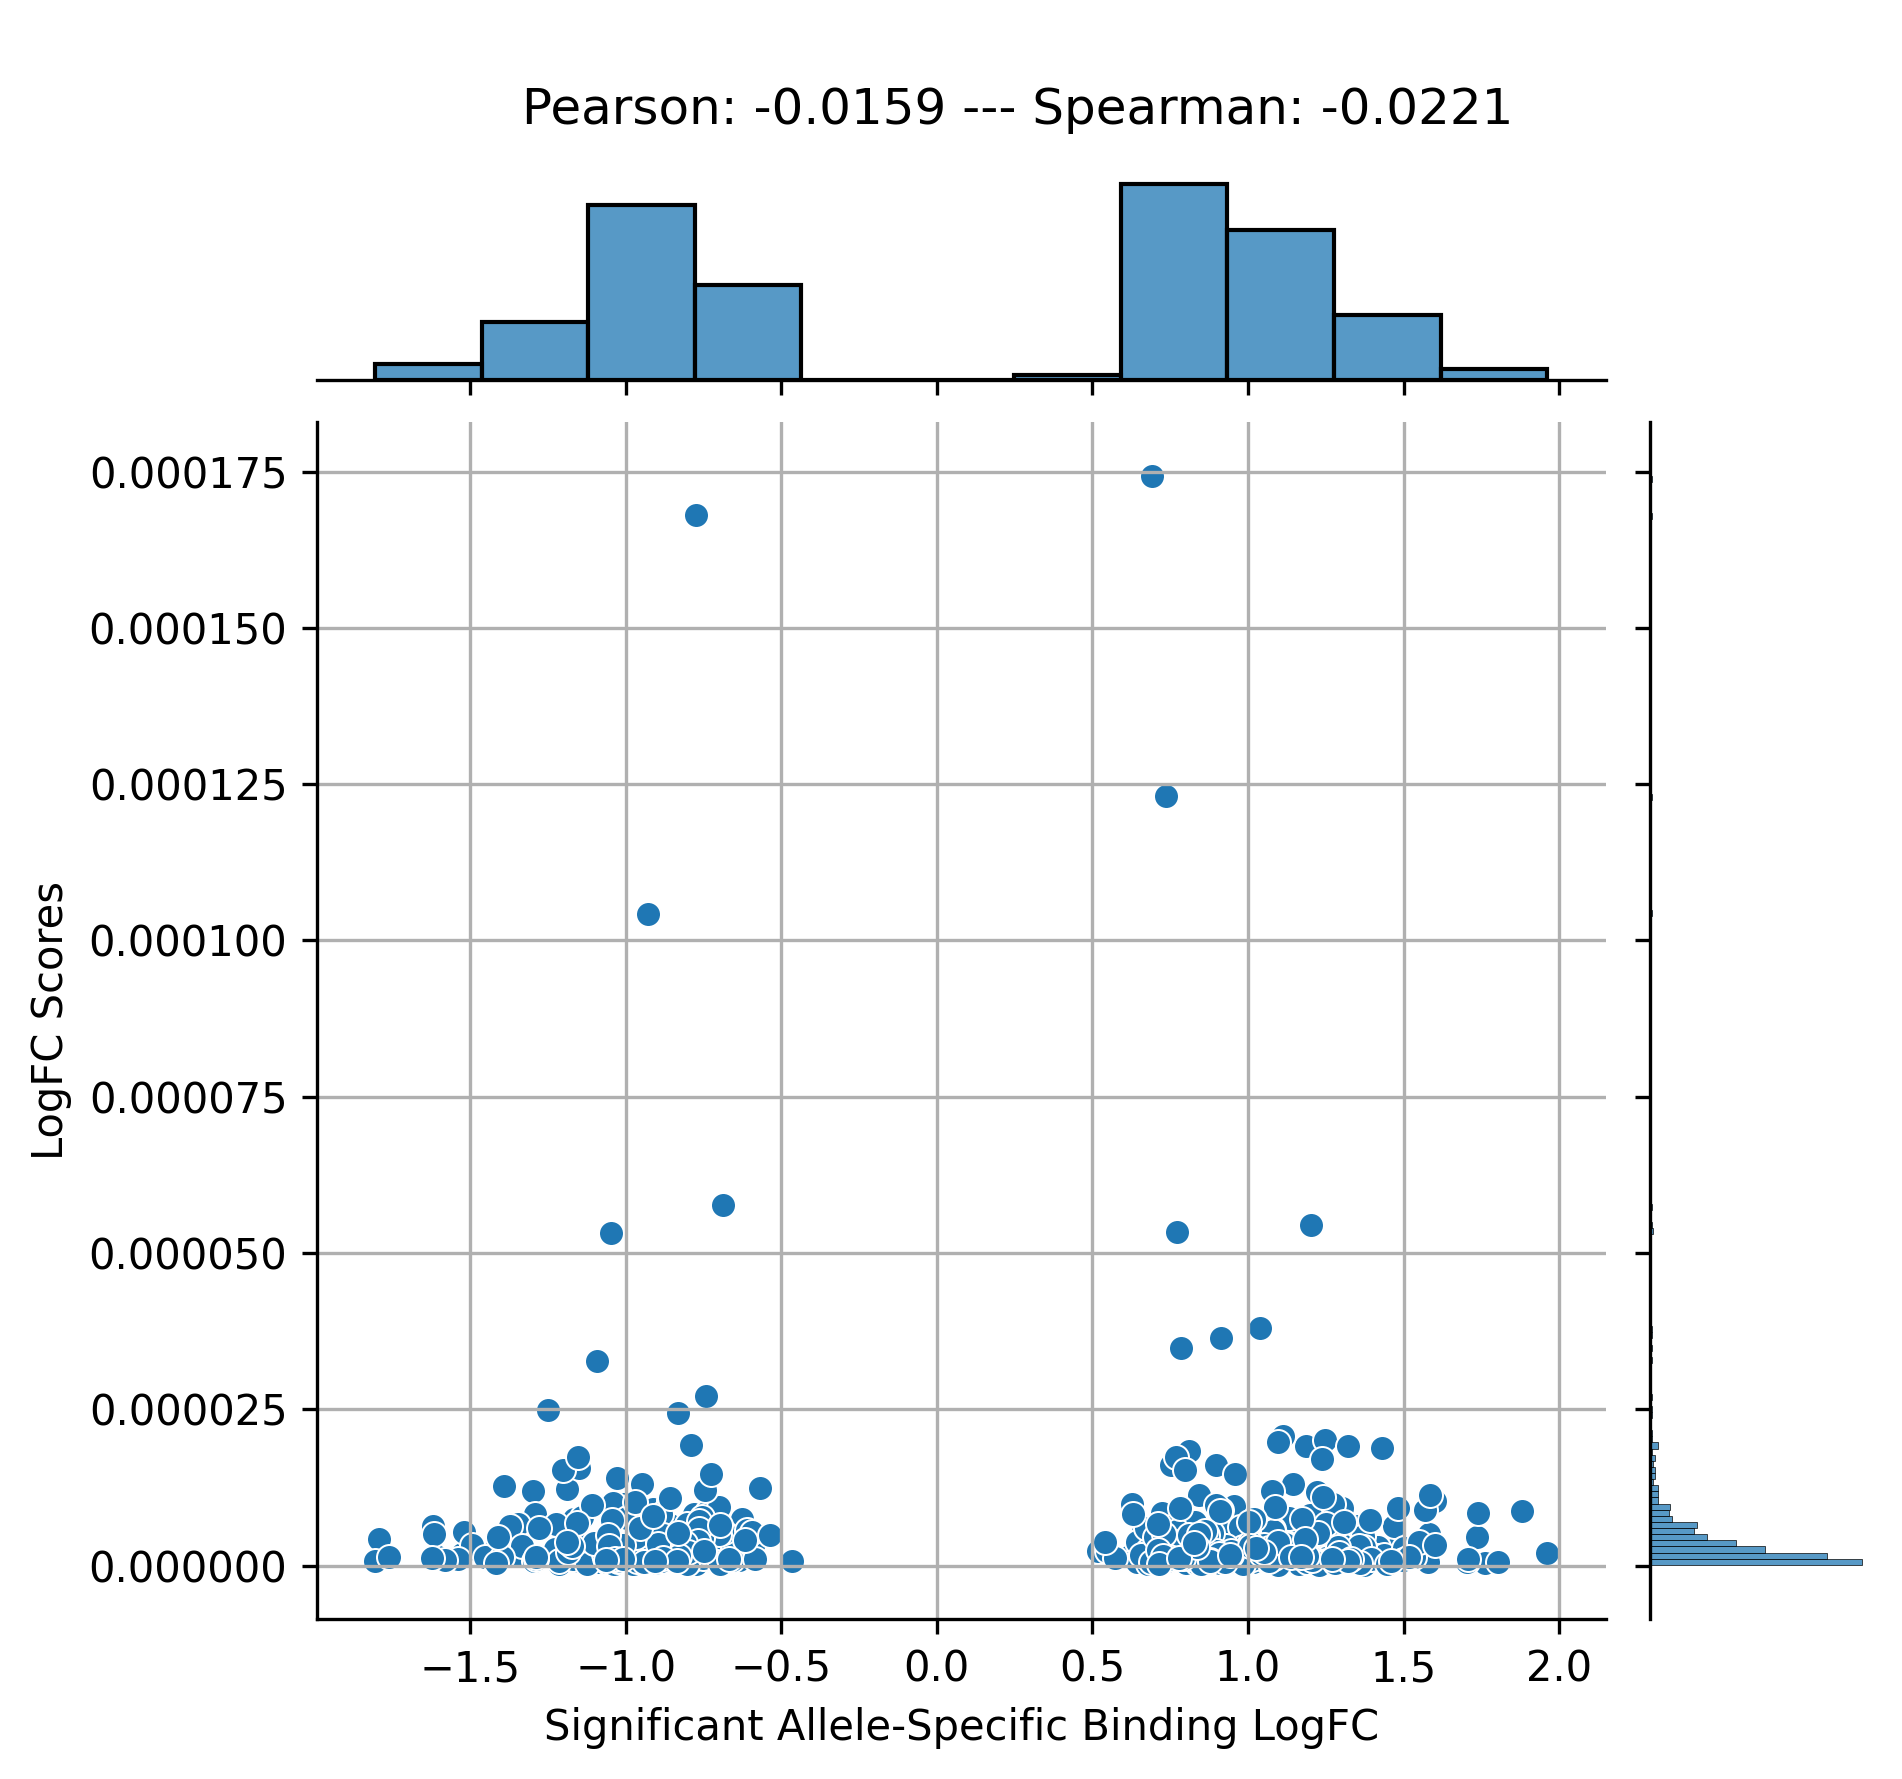

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Caduceus Yoruba Significant dsQTLs


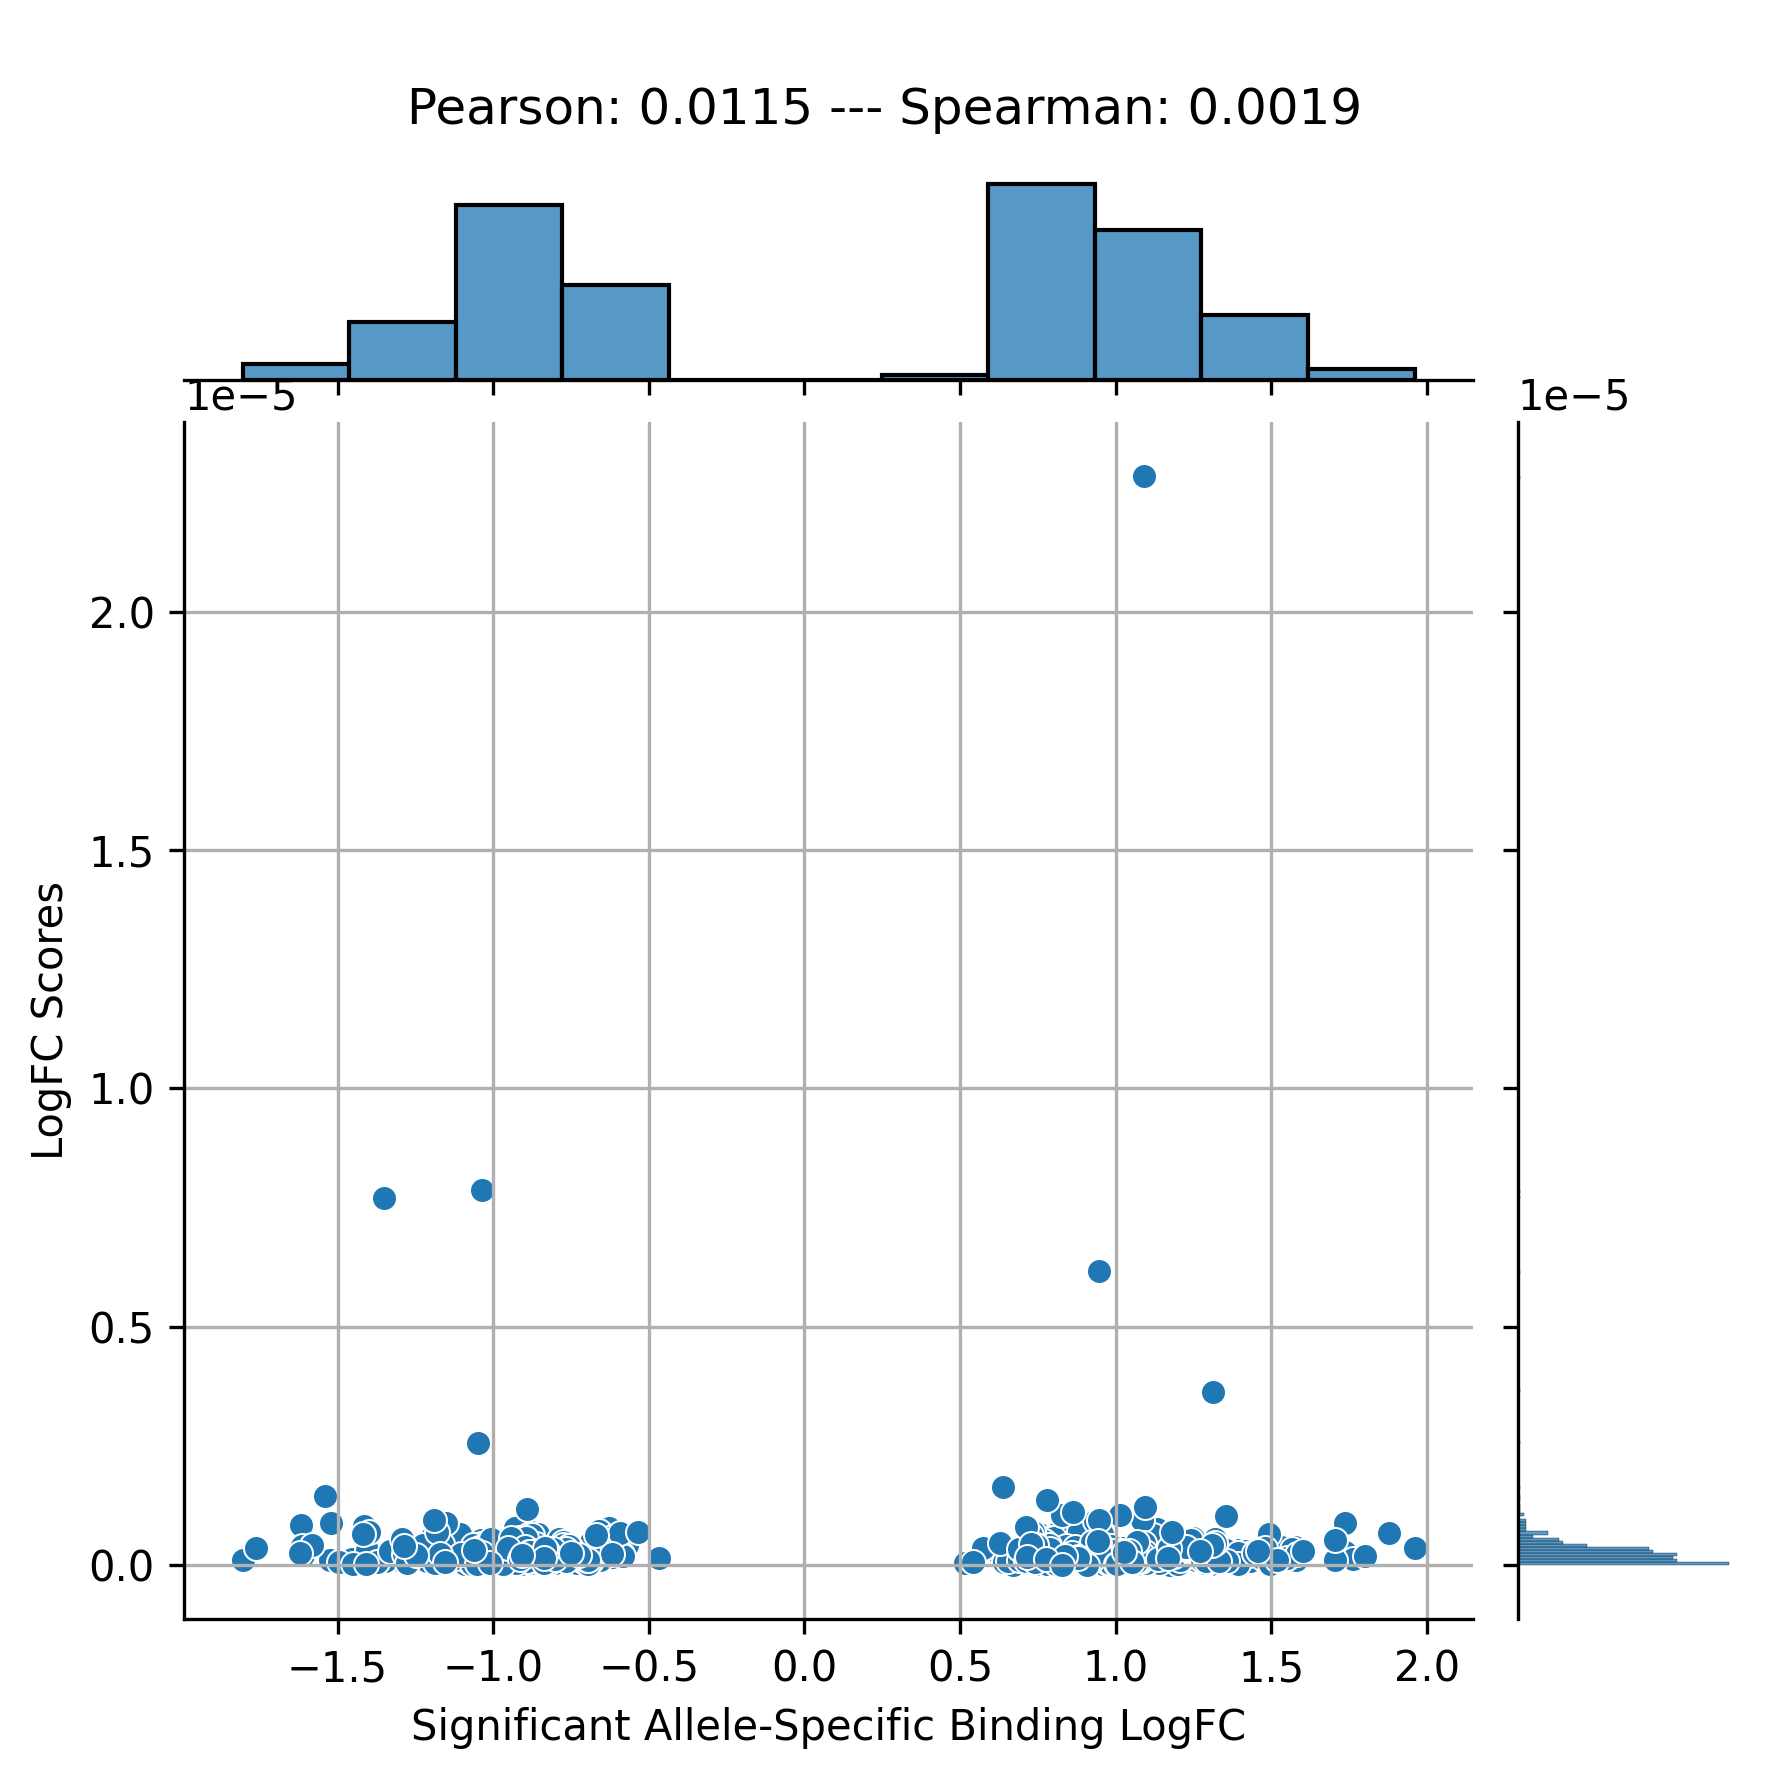

In [6]:
model_names=["DNABERT-2-117M", "gena-lm-bert-large-t2t", "hyenadna-large-1m-seqlen-hf",
             "nucleotide-transformer-v2-500m-multi-species", "Mistral-DNA-v1-1.6B-hg38", "caduceus-ps_seqlen-131k_d_model-256_n_layer-16"]
models=["DNABert2", "Gena LM", "HyenaDNA", "Nucleotide Transformer", "Mistral DNA", "Caduceus"]
model_path = os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/zero_shot/embeddings")

afr_counts_pvals = []
afr_counts_auprc = []
afr_counts_auroc = []
afr_counts_pearson = []
afr_counts_spearman = []

yoruba_counts_pvals = []
yoruba_counts_auprc = []
yoruba_counts_auroc = []
yoruba_counts_pearson = []
yoruba_counts_spearman = []

for model_name, model in zip(model_names, models):
    
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.tsv")
    ctrl_afr_countss = filtered_var_afr_caQTLs_df_ctrl["cosine_distance"]
    sig_afr_countss = filtered_var_afr_caQTLs_df_sig["cosine_distance"]
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_countss, sig_afr_countss, alternative="less")
    afr_counts_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    print(f"{model} African Significant caQTLs")
    pearson, spearman = beta_logfc(filtered_var_afr_caQTLs_df_sig, "", "cosine distance", "cosine_distance")
    auprc, auroc = get_precision_recall_auc(ctrl_afr_countss, sig_afr_countss)
    afr_counts_auprc += [auprc]
    afr_counts_auroc += [auroc]
    afr_counts_pearson += [pearson]
    afr_counts_spearman += [spearman]
    print(auprc, auroc, pearson, spearman)
    
for model_name, model in zip(model_names, models):    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/yoruban.dsqtls.benchmarking.tsv")
    ctrl_yoruba_countss = filtered_var_yoruba_caQTLs_df_ctrl["cosine_distance"]
    sig_yoruba_countss = filtered_var_yoruba_caQTLs_df_sig["cosine_distance"]
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_countss, sig_yoruba_countss, alternative="less")
    yoruba_counts_pvals += [yoruba_pval]
    print(f"{model} Yoruba Significant dsQTLs")
    pearson, spearman = est_size_logfc(filtered_var_yoruba_caQTLs_df_sig, "", "Cosine Distance", "cosine_distance")
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_countss, sig_yoruba_countss)
    yoruba_counts_auprc += [auprc]
    yoruba_counts_auroc += [auroc]
    yoruba_counts_pearson += [pearson]
    yoruba_counts_spearman += [spearman]

In [9]:
model_names=["nucleotide-transformer-v2-500m-multi-species", "hyenadna-large-1m-seqlen-hf",
            "DNABERT-2-117M", "gena-lm-bert-large-t2t", "Mistral-DNA-v1-1.6B-hg38",  "caduceus-ps_seqlen-131k_d_model-256_n_layer-16"]
models=["Nucleotide Transformer", "HyenaDNA", "DNABert2", "Gena LM", "Mistral DNA", "Caduceus"]
model_path = os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/zero_shot/embeddings")

afr_embeddings_pvals = []
afr_embeddings_auprc = []
afr_embeddings_auroc = []

yoruba_embeddings_pvals = []
yoruba_embeddings_auprc = []
yoruba_embeddings_auroc = []

for model_name, model in zip(model_names, models):
    
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.tsv")
    ctrl_afr_embeddings = filtered_var_afr_caQTLs_df_ctrl["cosine_distance"]
    sig_afr_embeddings = filtered_var_afr_caQTLs_df_sig["cosine_distance"]
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_embeddings, sig_afr_embeddings, alternative="less")
    afr_embeddings_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    auprc, auroc = get_precision_recall_auc(ctrl_afr_embeddings, sig_afr_embeddings)
    afr_embeddings_auprc += [auprc]
    afr_embeddings_auroc += [auroc]
    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/yoruban.dsqtls.benchmarking.tsv")
    ctrl_yoruba_embeddings = filtered_var_yoruba_caQTLs_df_ctrl["cosine_distance"]
    sig_yoruba_embeddings = filtered_var_yoruba_caQTLs_df_sig["cosine_distance"]    
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_embeddings, sig_yoruba_embeddings, alternative="less")
    yoruba_embeddings_pvals += [yoruba_pval]
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_embeddings, sig_yoruba_embeddings)
    yoruba_embeddings_auprc += [auprc]
    yoruba_embeddings_auroc += [auroc]

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.8433071587166782e-07
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.15931544573405e-05
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.999999983341147
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.01278163217190406
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.5139708476493737e-08


In [10]:
from tabulate import tabulate

mydata = [
    afr_embeddings_pvals,
    afr_embeddings_auprc,
    afr_embeddings_auroc,
    yoruba_embeddings_pvals,
    yoruba_embeddings_auprc,
    yoruba_embeddings_auroc
]
index = ["African P value", "African AUPRC", "African AUROC",
          "Yoruba P value", "Yoruba AUPRC", "Yoruba AUROC"]

mydata = [[i] + row for i, row in zip(index, mydata)]
print(tabulate(mydata, headers=models, tablefmt="grid"))

+-----------------+--------------------------+-------------+------------+-----------+---------------+-------------+
|                 |   Nucleotide Transformer |    HyenaDNA |   DNABert2 |   Gena LM |   Mistral DNA |    Caduceus |
+=================+==========================+=============+============+===========+===============+=============+
| African P value |              1.84331e-07 | 1.15932e-05 |  1         | 0.0127816 |   1.51397e-08 | 8.94437e-08 |
+-----------------+--------------------------+-------------+------------+-----------+---------------+-------------+
| African AUPRC   |              0.0863223   | 0.0850768   |  0.0768987 | 0.0850954 |   0.0887379   | 0.087063    |
+-----------------+--------------------------+-------------+------------+-----------+---------------+-------------+
| African AUROC   |              0.518533    | 0.515425    |  0.479869  | 0.508138  |   0.520192    | 0.519027    |
+-----------------+--------------------------+-------------+------------